# Machine Learning on Prediction for Customer Churn

This project builds on my prior experience with machine learning methods, where I contributed to a group project predicting the success of Kickstarter campaigns. My responsibility was training an XGBoost model. For this solo project, I apply a similar process to address the business-critical problem of customer retention.

# Project Details

In this project, I tackle the challenge of predicting customer churn by building a Customer Churn Prediction model. Customer churn refers to the rate at which customers stop doing business with a company, often measured as the number of customers who leave or fail to renew their subscription. Understanding and predicting churn is crucial for businesses aiming to retain customers and improve long-term growth.

__INFORMATION ON DATA__   
The data is retreived from [Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/customer-churn) along with the description of the columns. And the dataset is defined as "The Customer Churn Classification dataset is a vital resource for businesses seeking to understand and predict customer churn, a critical metric that represents the rate at which customers stop doing business with a company over a given period. Understanding churn is essential for any customer-focused company, as retaining customers is generally more cost-effective than acquiring new ones. The dataset is designed to provide a detailed view of customer characteristics and behaviors that could potentially lead to churn, allowing companies to take preemptive action to improve customer retention."

__BUSINESS CASE__    
You work as a Data Scientist for a bank that offers one subscription-based package or product per customer.    
You are tasked with developing a predictive model to estimate the likelihood of customer churn.      
This model must identify which customers are at risk of cancelling their subscriptions, given the fluctuations in customer retention that the bank experiences.

# Navigation

- [Understanding the Dataset](#understanding-the-dataset)
- [Explanatory Data Analysis](#explanatory-data-analysis)
- [Hypotheses and Testing Hypotheses](#hypotheses)
- [EDA Conclusion](#eda-conclusion)
- [Data Preprocessing](#data-preprocessing)
- [Training Models](#training-models)
- [Next Steps for Improvement](#next-steps-for-improvement)
- [Conclusion](#conclusion)

# Getting started

Setting the working environment

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')

# Understanding the dataset

This section provides an overview of the dataset, including its structure, the number of rows and columns, and a preview of the data.

In [2]:
# read in csv file and display
df = pd.read_csv("data_churn/customer_churn.csv")
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,France,Male,18,2,160980.03,145936.28,0
1,1620,15770309,McDonald,656,France,Male,18,10,151762.74,127014.32,0
2,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,71811.90,0
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,197322.13,0
4,2137,15621893,Bellucci,727,France,Male,18,4,133550.67,46941.41,0
5,2142,15758372,Wallace,674,France,Male,18,7,0.00,55753.12,1
6,3331,15657439,Chao,738,France,Male,18,4,0.00,47799.15,0
7,3513,15657779,Boylan,806,Spain,Male,18,3,0.00,86994.54,0
8,3518,15757821,Burgess,771,Spain,Male,18,1,0.00,41542.95,0
9,3687,15665327,Cattaneo,706,France,Male,18,2,176139.50,129654.22,0


There are two categorical features: `Geography` and `Gender`

In [4]:
# check the columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited'],
      dtype='object')

Here are the descriptions of the columns:

| Column name | Description |
| --- | ----------- |
| CustomerId | A unique identifier for each customer |
| Surname | Contains the surname of the customer |
| CreditScore | A key financial indicator, the credit score reflects a customer's financial health |
| Geography | The geographical location of customers |
| Gender | Identifies the gender of the customer |
| Age | Contains the age of the customer |
| Tenure | Reflects how long a customer has been with the company (a bank in our case) |
| Balance | The account balance of customers |
| EstimatedSalary | A customer's estimated salary provides an indication of their financial well-being |
| Exited | This is the target column, which indicates whether the customer churned (1 for churned and 0 for not churned) |

In [ ]:
# check the shape of dataset
df.shape

(10000, 11)

There are 10000 rows and 11 columns in our dataset

In [6]:
# check data-types and for possible missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


__Important Notes on Data__     
- There are no missing values.
- Only the `Geography` and `Gender` columns need to be converted into dummy variables. This is necessary to include these features in our analysis and model training.

This will be done in the next steps.

# Explanatory Data Analysis

In [4]:
# check for duplicate rows in CustomerId column
df["CustomerId"].duplicated().value_counts()

CustomerId
False    10000
Name: count, dtype: int64

In [3]:
# drop columns we don't need
df.drop(["RowNumber", "Surname"], axis=1, inplace=True)

In [4]:
# check result
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,15787619,844,France,Male,18,2,160980.03,145936.28,0
1,15770309,656,France,Male,18,10,151762.74,127014.32,0
2,15569178,570,France,Female,18,4,82767.42,71811.90,0
3,15795519,716,Germany,Female,18,3,128743.80,197322.13,0
4,15621893,727,France,Male,18,4,133550.67,46941.41,0


__Future engineering__  
As previously discussed, we must transform the `Geography` and `Gender` categorical columns into a more readable format for model training.   
We can utilise pandas' `get_dummies()` function to achieve this transformation.

In [4]:
# convert categorical to dummies
df_copy = pd.get_dummies(df, drop_first=True)

In [5]:
# check result
df_copy.head()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15787619,844,18,2,160980.03,145936.28,0,False,False,True
1,15770309,656,18,10,151762.74,127014.32,0,False,False,True
2,15569178,570,18,4,82767.42,71811.90,0,False,False,False
3,15795519,716,18,3,128743.80,197322.13,0,True,False,False
4,15621893,727,18,4,133550.67,46941.41,0,False,False,True


In cases where the `Geography_Germany` and `Geography_Spain` columns contain only `False` values, the customer's location is identified as `France` and the same approach is applied to the `Gender` column, where `False` represents `Female`.

In [11]:
# get an overview with the describe() function
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000,1.000000


Let's take a moment to visualise this table and all these numbers.

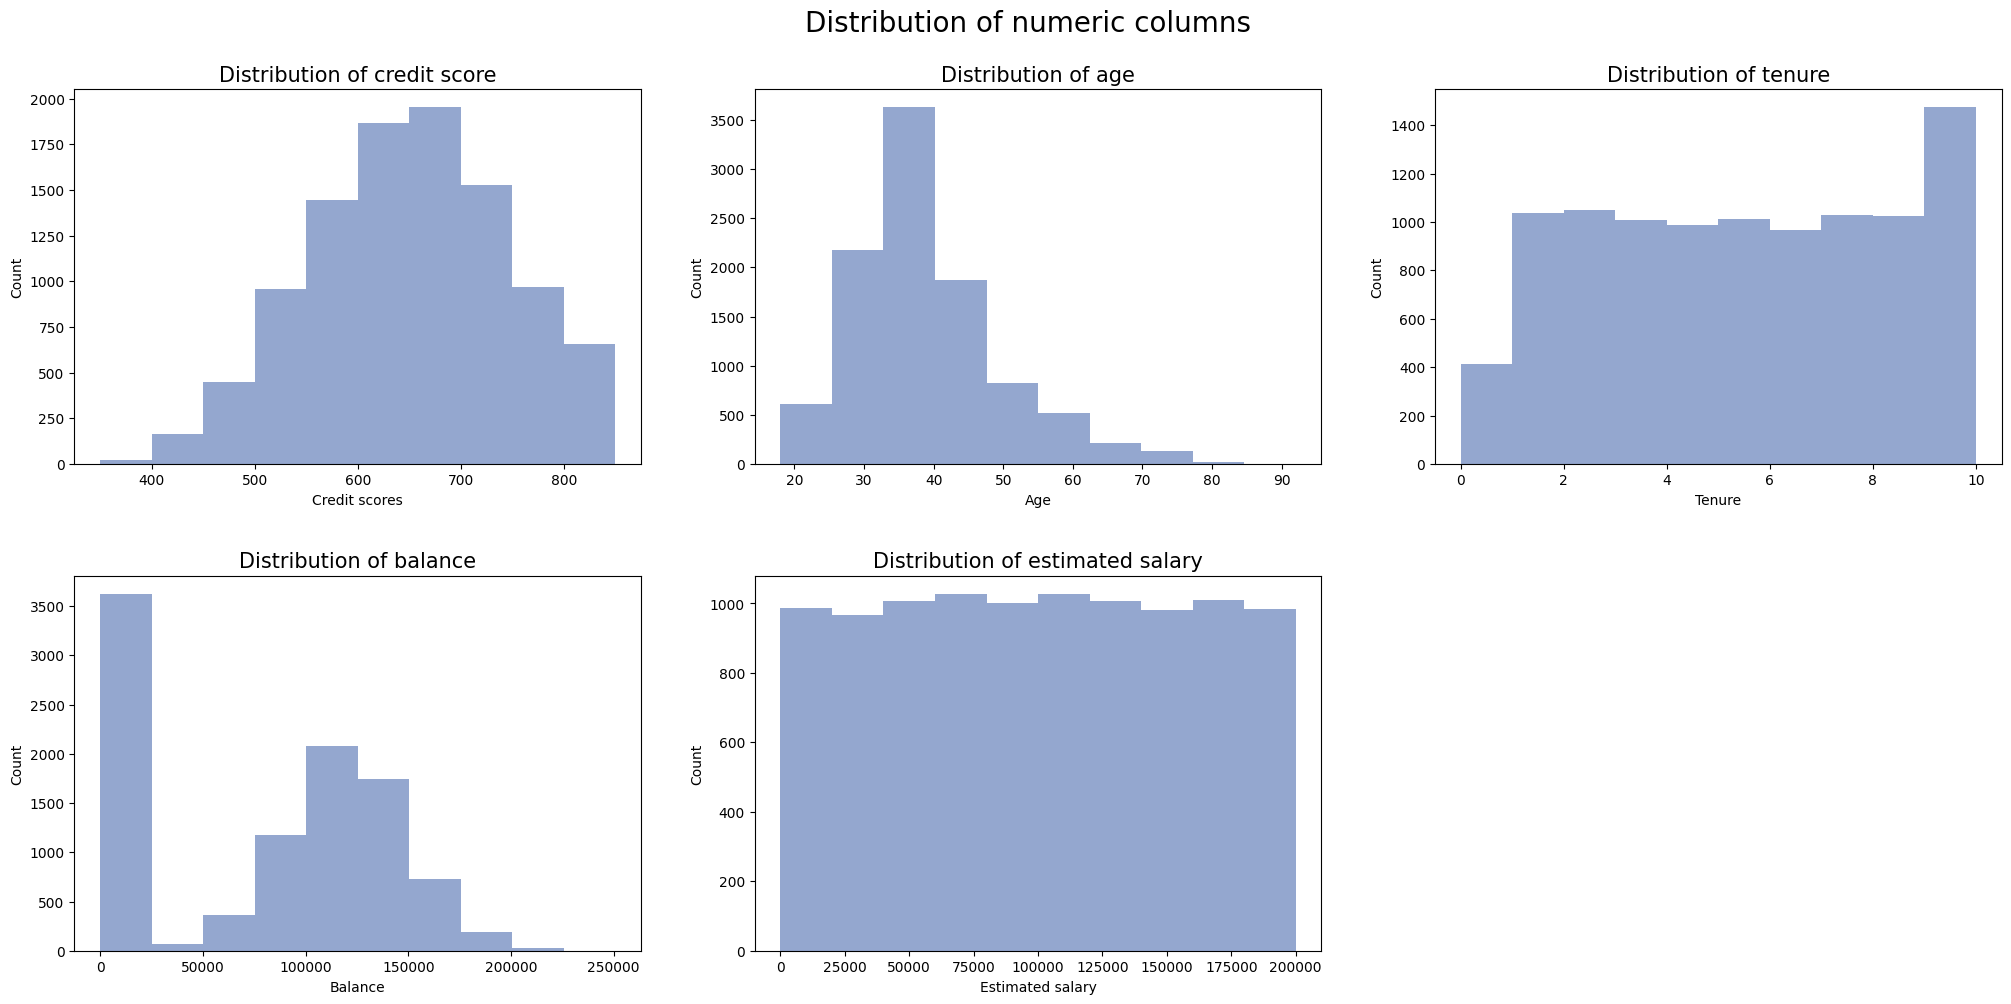

In [19]:
color = sns.color_palette('BuPu', 8)[3]

fig, ax = plt.subplots(2,3, figsize=(20,10)) 
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() 
plt.subplots_adjust(hspace = .3, wspace = .2, top = .9) 

ax[0][0].hist(x=df['CreditScore'], color=color)
ax[0][0].set(xlabel="Credit scores", ylabel="Count")
ax[0][0].set_title("Distribution of credit score", fontsize = 15);  

ax[0][1].hist(x= df['Age'], color=color)
ax[0][1].set(xlabel="Age", ylabel="Count")
ax[0][1].set_title("Distribution of age", fontsize = 15);

ax[0][2].hist(x=df['Tenure'], color=color)
ax[0][2].set(xlabel="Tenure", ylabel="Count")
ax[0][2].set_title("Distribution of tenure", fontsize = 15);

ax[1][0].hist(x=df['Balance'], color=color)
ax[1][0].set(xlabel="Balance", ylabel="Count")
ax[1][0].set_title("Distribution of balance", fontsize = 15);
                              
ax[1][1].hist(x=df['EstimatedSalary'], color=color)
ax[1][1].set(xlabel="Estimated salary", ylabel="Count")
ax[1][1].set_title("Distribution of estimated salary", fontsize = 15);

fig.delaxes(ax[1][2]);

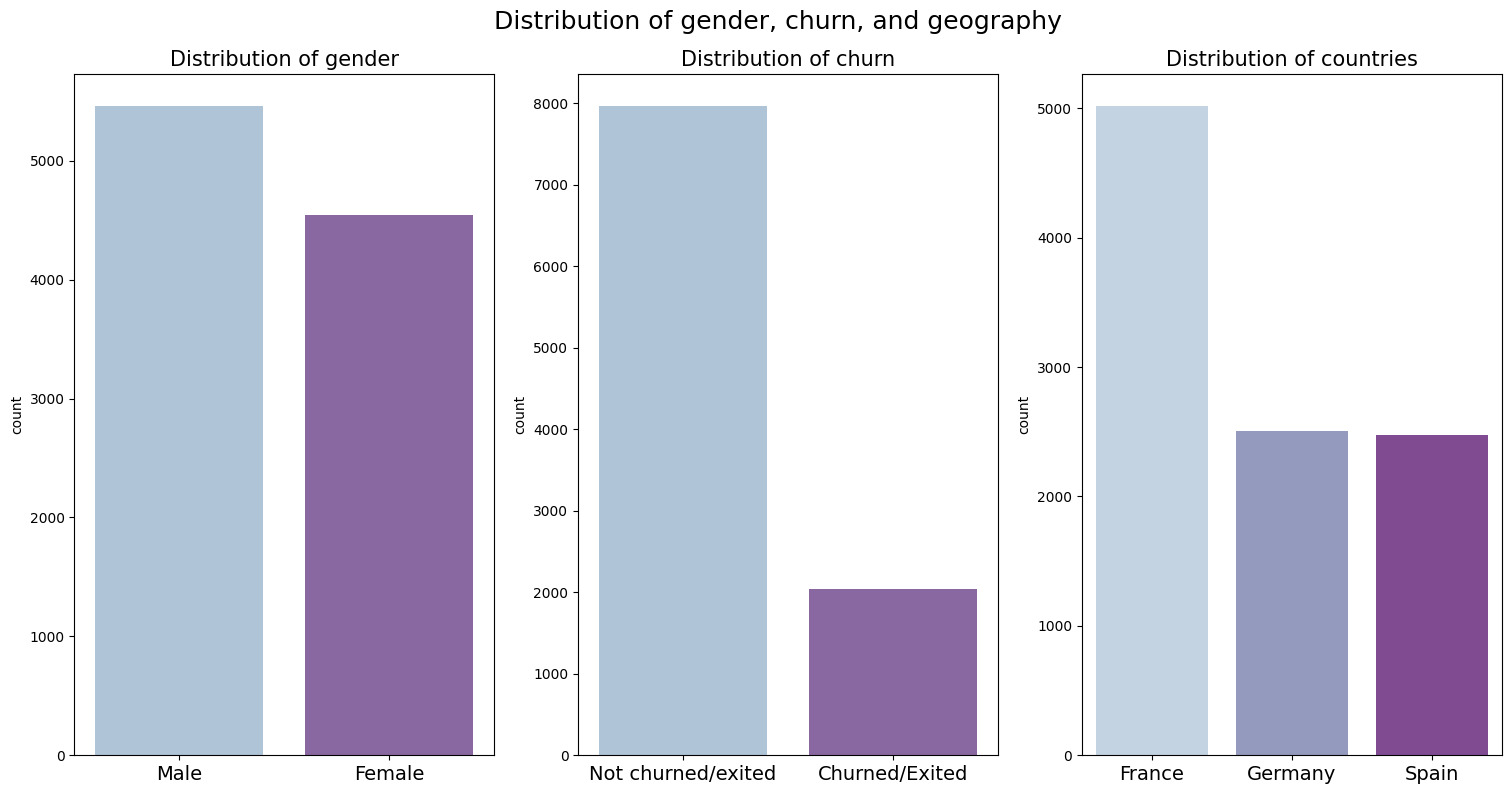

In [21]:
fig, ax = plt.subplots(1,3, figsize=(15,8)) 
plt.suptitle('Distribution of gender, churn, and geography', fontsize=18)
fig.tight_layout() 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) 
 
f1 = sns.countplot(x=df['Gender'], ax=ax[0], palette='BuPu') 
f1.tick_params(axis='x', labelsize=14)
f1.set(xlabel=None) 
f1.set_title('Distribution of gender', fontsize=15); 
 
f2 = sns.countplot(x=df['Exited'], ax=ax[1], palette='BuPu') 
f2.tick_params(axis='x') 
f2.set_xticks([0,1])
f2.set_xticklabels(labels=["Not churned/exited", "Churned/Exited"], fontsize=14)
f2.set(xlabel=None) 
f2.set_title('Distribution of churn', fontsize=15); 

f3 = sns.countplot(x=df['Geography'], ax=ax[2], palette='BuPu') 
f3.tick_params(axis='x', labelsize=14) 
f3.set(xlabel=None) 
f3.set_title('Distribution of countries', fontsize=15); 


In [28]:
# showcase the correlation matrix between these variables
corr_columns=["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "Exited"]
corr_mtrx=df[corr_columns].corr()
corr_mtrx

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,0.012797,0.118533
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,0.012097,1.000000


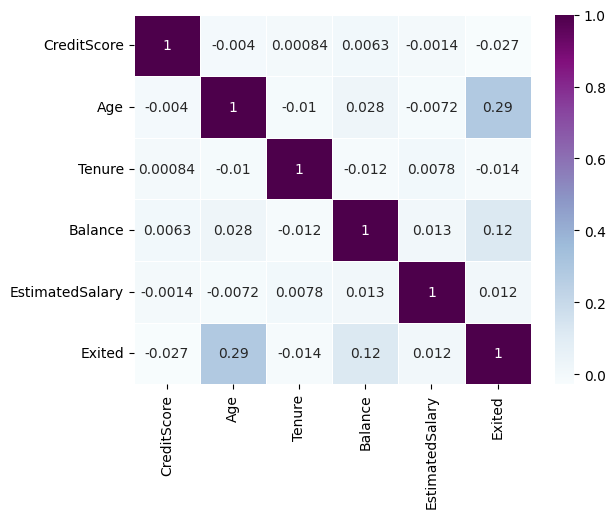

In [34]:
# draw a heatmap 
plt.figure()
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='BuPu')

This heatmap indicates that the relationships between the features of our dataset are not particularly strong. However, to make accurate predictions, we need to gain a more comprehensive understanding of our dataset.

#### What can we understand from the tables?

The descriptive statistics offer a useful overview of the dataset, providing insights into customer characteristics and behaviours. The following points are worthy of note:

__1. Customer behaviour:__

- __`Exited` (Churn):__ The average value of __0.2037__ indicates that __approaximately 20% of customers have canceled their subscriptions or did not renew them__. This suggests a notable churn rate that requires further investigation.

- __`Balance`:__ The average account balance is __76,458.89__, with a wide range from __0 to 250,898.09__. Interestingly, the 25th percentile is __0__, meaning a significant portion of customers have no balance in their accounts. This could indicate low engagement or specific banking habits.

- __`Tenure`:__ Customers stay with the bank for an average of __5 years__, with a median tenure of __5 years__. The range spans from __0 to 10 years__, reflecting varying levels of loyalty.


__2. Customer demographics:__

- __`Age`:__ The average age is __39 years__, with customers ranging from __18 to 92 years old__. The 25th and 75th percentiles (32 and 44 years) show that most customers fall within a middle-agged demographic.

- __`CreditScore`:__ The average credit score is __650.53__, with most customers scoring between __584 (25th percentile) and 718 (75th percentile)__. This indicates a predominantly moderate credit profile.

- __`EstimatedSalary`:__ Customers have an average estimated salary of __100,090__, with significant variability (standard deviation = __57,510.49__). Salaries range from __11.58 to 199,992.48__, reflecting a diverse income group.

__3. Important notes:__

- __Churn Drivers:__ The churn rate is a key focus for the project. Features like `Balance`, `Tenure`, and `Age` may provide predictive insights into customer retention. However, the data set is unbalanced, with a churn rate of 20%, this will be dealt with in the coming steps.

- __Zero Balances:__ A large number of customers (at least 25%) have no balance, which could impact their likelihood of churning.

- __Wide Ranges:__ Features like `EstimatedSalary` and `Age` show substantial variation, which may introduce challenges in model training but also opportunities to uncover interesting patterns.

# Hypotheses

In the light of above showcased results and interpretations, now we can formulate some hypotheses;

1. Customers with higher tenure are less likely to churn.
2. Customers with lower balances are more likely to churn.
3. Customers with lower estimated salaries are more likely to churn.
4. Customers older than 35 are less likely to churn.
5. Customers with higher credit scores are less likely to churn.
6. Customer churn is less likely influenced by customer's gender.
7. Customer churn is less likely influenced by the customer's geographic region of origin.

Once these hypotheses have been tested, we will have a comprehensive understanding of the data. This will enable us to prepare the data for model training, thus enabling us to make predictions.

# Testing hypotheses

__1. Customers with higher tenure less likely to churn.__

Let's first check the distribution of the length of subscribtion years.

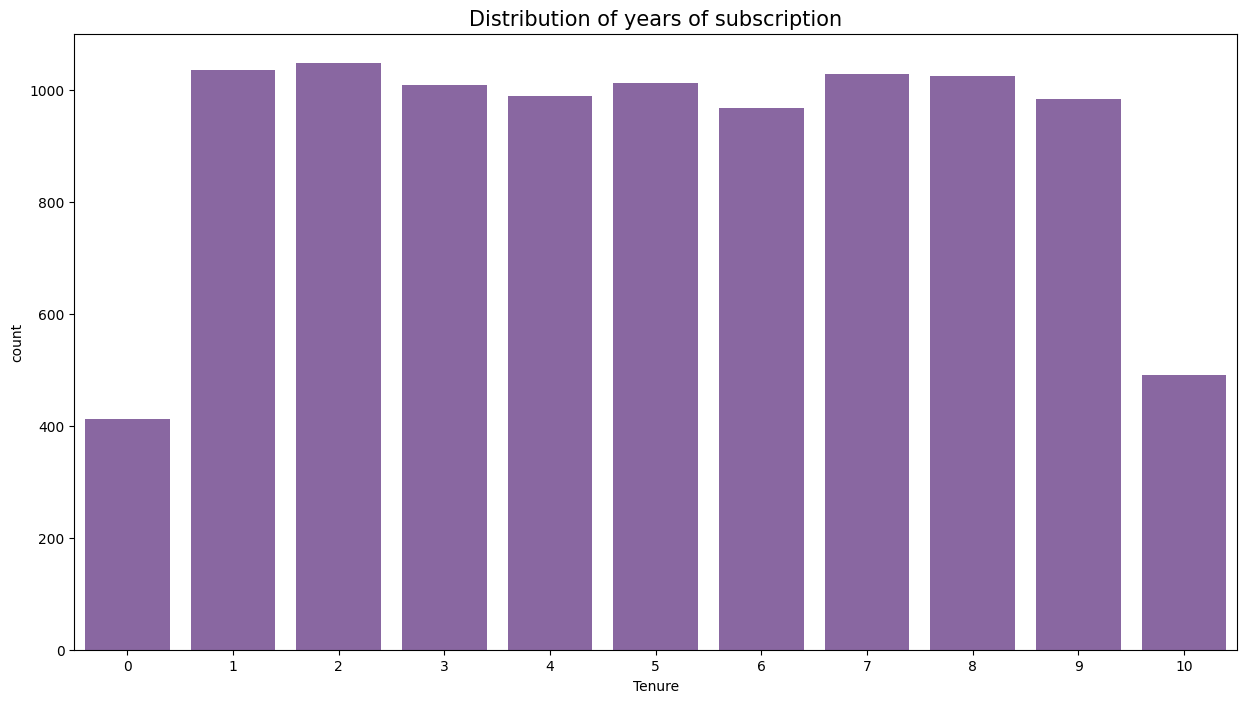

In [45]:
color = sns.color_palette('BuPu', 8)[5]

plt.figure(figsize=(15,8))
f1 = sns.countplot(x=df['Tenure'], color=color) 
f1.tick_params(axis='x') 
f1.set(xlabel="Tenure") 
f1.set_title('Distribution of years of subscription', fontsize=15); 

Now we can see the relationship between `Tenure` and `Exited`. 

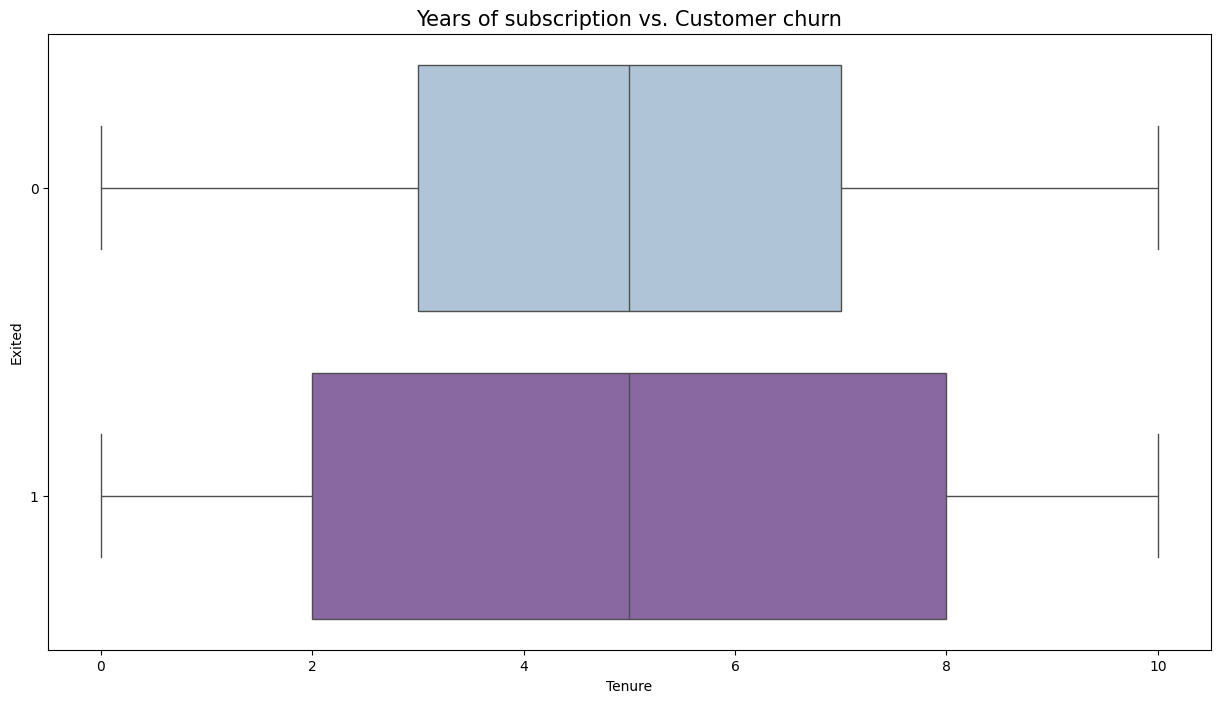

In [ ]:
plt.figure(figsize=(15,8))
f1 = sns.boxplot(x='Tenure', y='Exited', data=df, palette='BuPu', orient='h')
f1.set_title('Years of subscription vs. customer churn', fontsize=15);

The box plots for tenure are significantly overlapping between the churned and non-churned groups, indicating that tenure may not be a critical factor influencing customer churn.     

But let's check with a histogram where we can compare them in a detailed way.

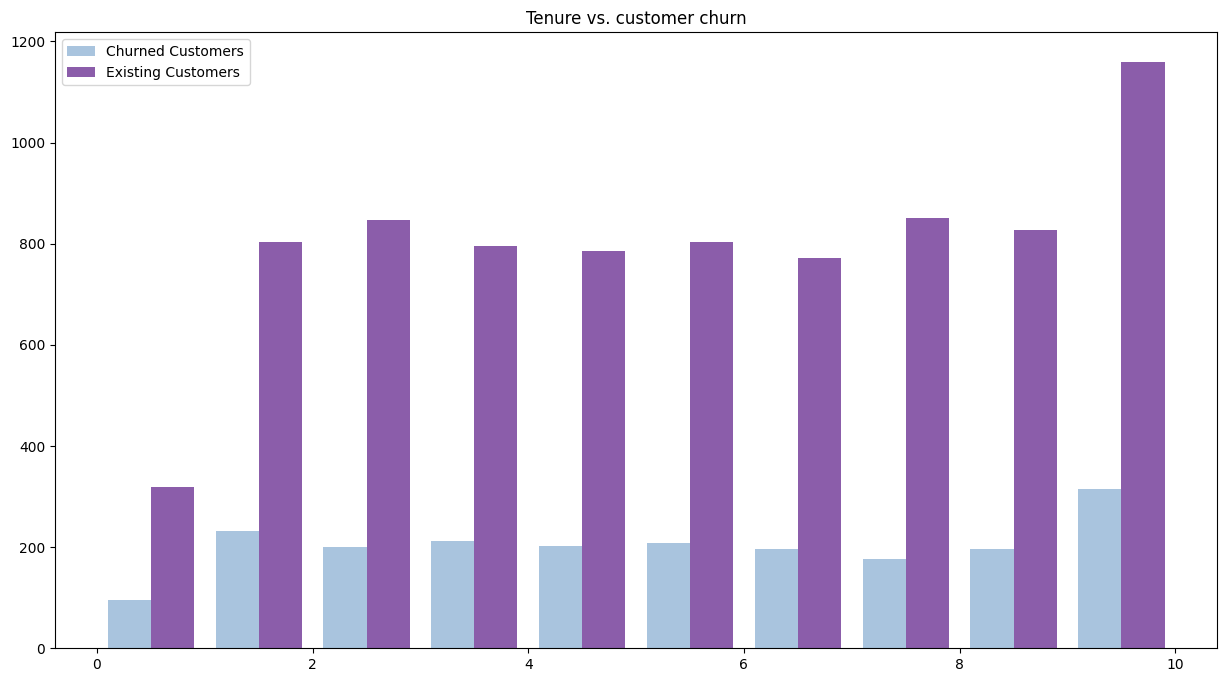

In [28]:
existing = df[df['Exited'] == 0]
churned = df[df['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(figsize=(15,8))

ax.hist([churned['Tenure'], existing['Tenure']], color=colors)
ax.set_title('Tenure vs. customer churn')
ax.legend(('Churned Customers', 'Existing Customers'))

In [29]:
# check the correlation between Tenure and Exited
df[['Tenure', 'Exited']].corr()

,Tenure,Exited
Tenure,1.000000,-0.014001
Exited,-0.014001,1.000000


The correlation between `Tenure` and `Exited` is found to be at a significantly low level.

Consequently, our __initial hypothesis has been tested and found to be invalid.__ There is no significant relationship between tenure and exited, and therefore we cannot conclude that customers with higher tenure are less likely to churn.

__2. Customers with lower balances are more likely to churn.__

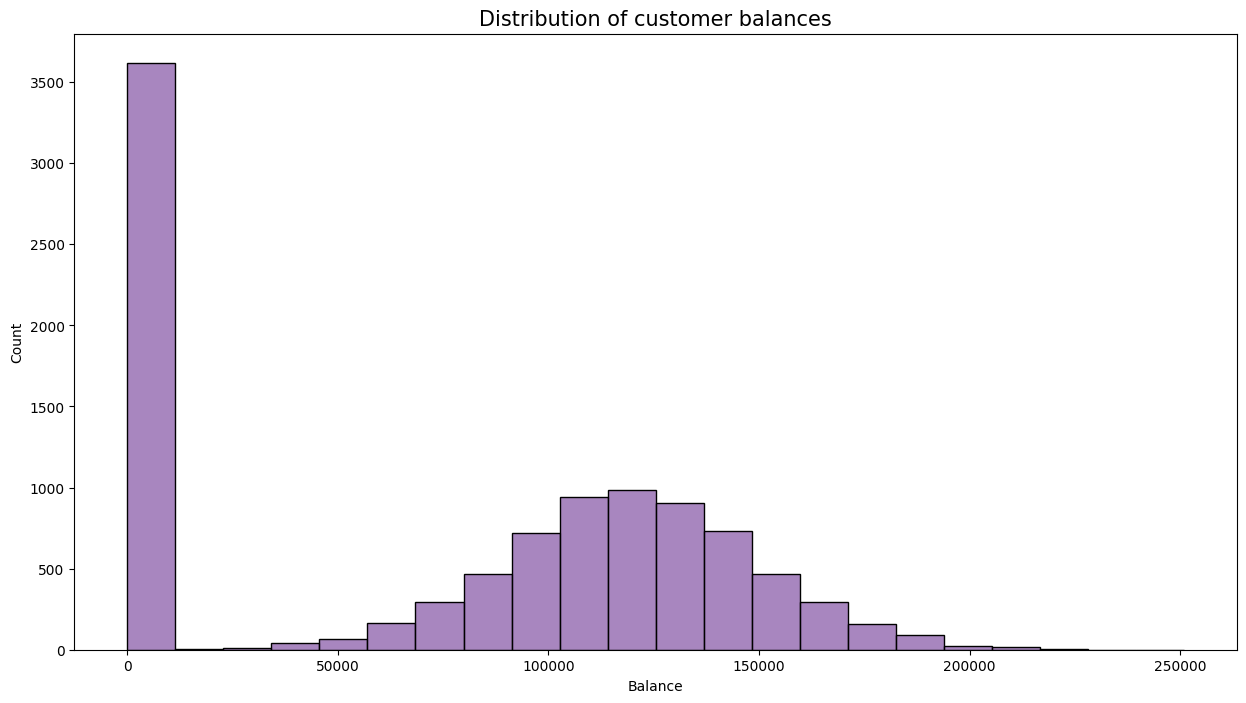

In [59]:
color = sns.color_palette('BuPu', 8)[5]

plt.figure(figsize=(15,8))
f1 = sns.histplot(x=df['Balance'], color=color) 
f1.tick_params(axis='x') 
f1.set(xlabel="Balance") 
f1.set_title('Distribution of customer balances', fontsize=15); 

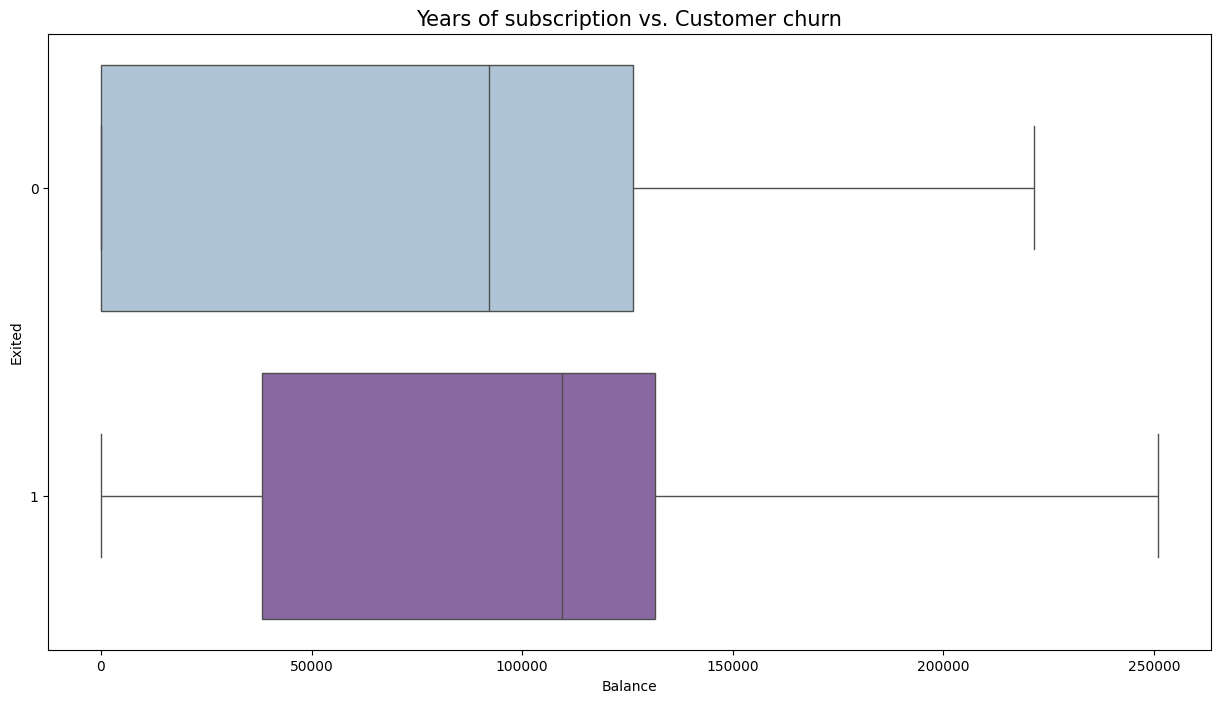

In [ ]:
plt.figure(figsize=(15,8))
f1 = sns.boxplot(x='Balance', y='Exited', data=df, palette='BuPu', orient='h')
f1.set_title('Customer balance vs. churn', fontsize=15);

While the comparison between 'Tenure' and 'Exited' differs slightly, the boxplots for `Balance` and `Exited` indicate a similar relationship between customer balance and subscription cancellation. 

To gain further insight, let's examine the relationship in detail.

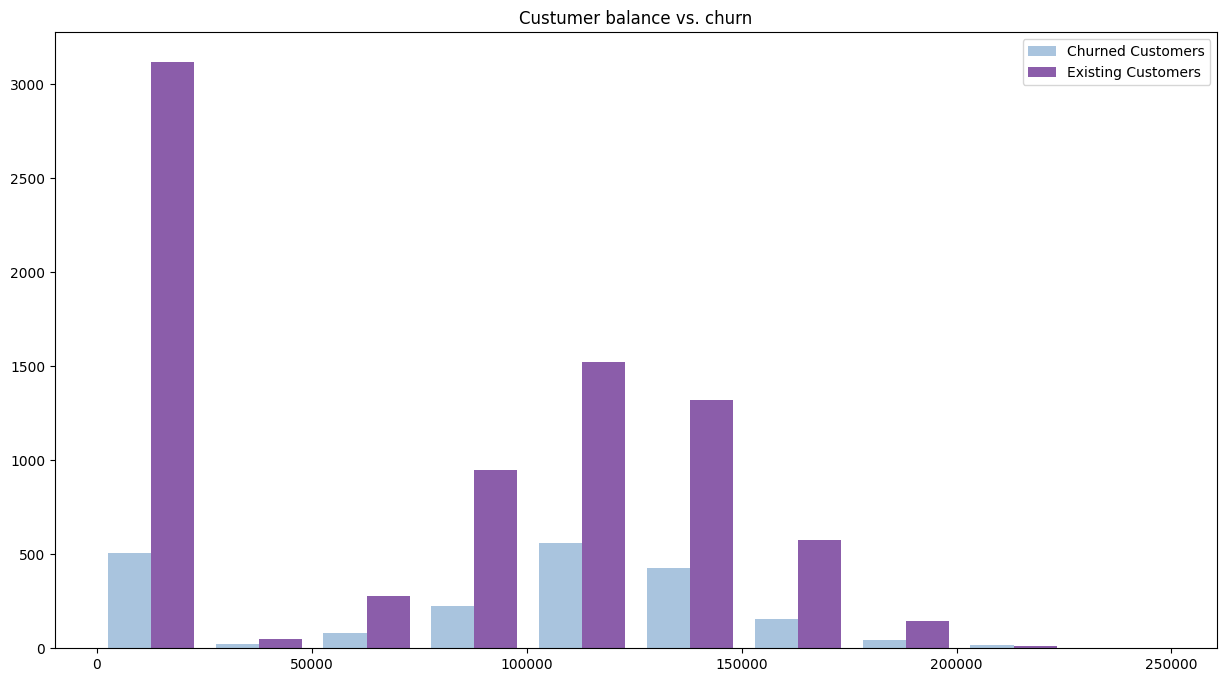

In [47]:
existing = df[df['Exited'] == 0]
churned = df[df['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(figsize=(15,8))

ax.hist([churned['Balance'], existing['Balance']], color=colors)
ax.set_title('Custumer balance vs. churn')
ax.legend(('Churned Customers', 'Existing Customers'))

In [18]:
df[['Balance', 'Exited']].corr()

,Balance,Exited
Balance,1.000000,0.118533
Exited,0.118533,1.000000


While there is a slight positive correlation, it is not significant enough to be used as the sole determining factor in whether a customer will cancel their subscription. Furthermore, the findings align with the initial observations regarding the high number of customers with zero balances. 

However, __our second hypothesis has been disproven.__ Consequently, there is no evidence to suggest that customers with lower balances are more likely to churn.

__3. Customers with lower estimated salaries are more likely to churn.__

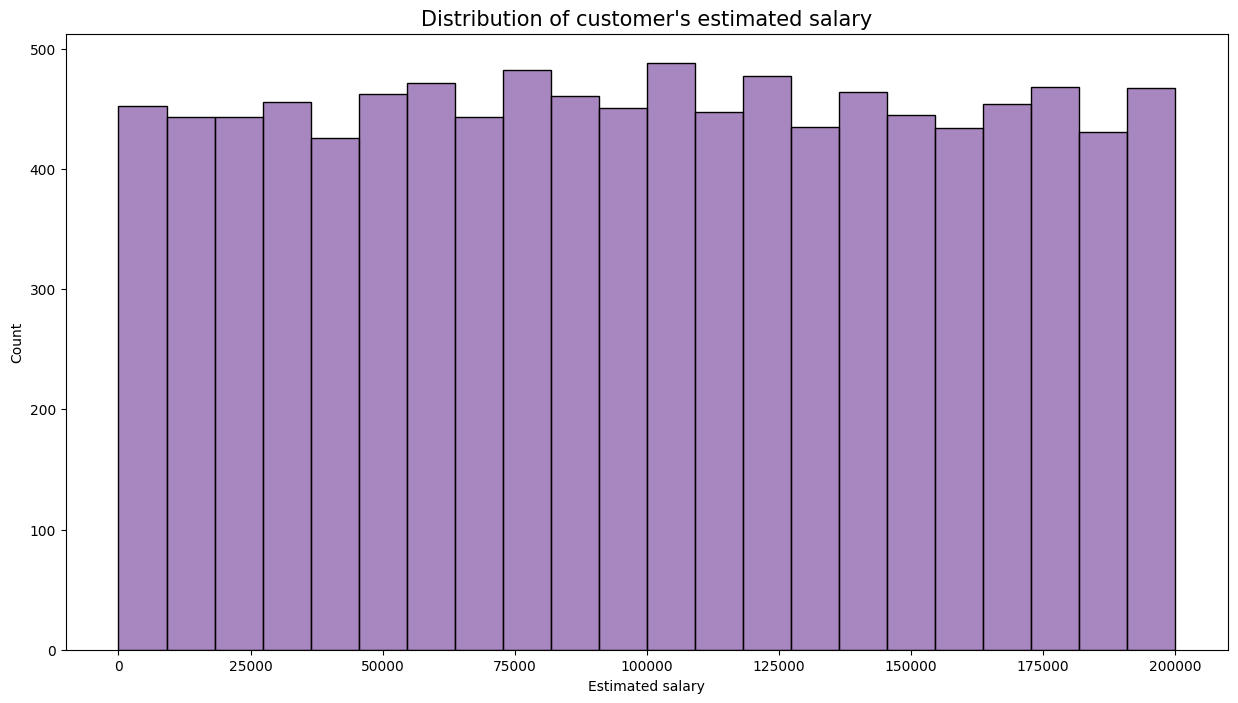

In [22]:
color = sns.color_palette('BuPu', 8)[5]

plt.figure(figsize=(15,8))
f1 = sns.histplot(x=df['EstimatedSalary'], color=color) 
f1.tick_params(axis='x') 
f1.set(xlabel="Estimated salary") 
f1.set_title("Distribution of customer's estimated salary", fontsize=15); 

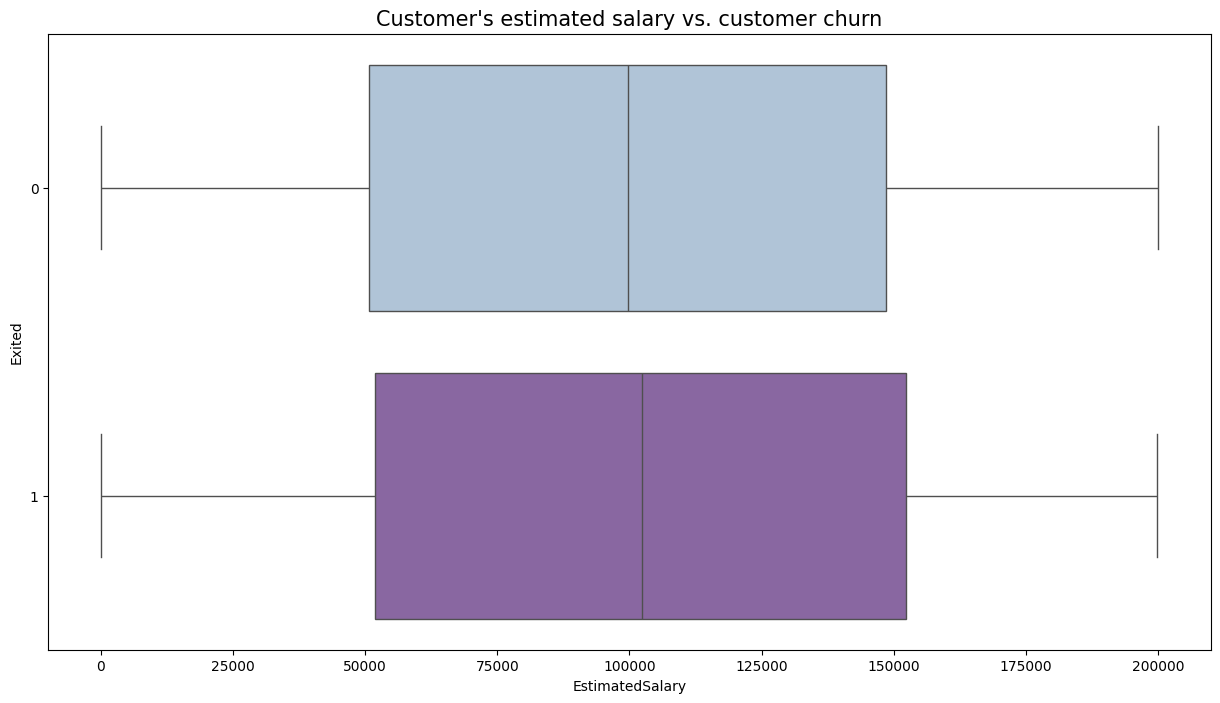

In [53]:
plt.figure(figsize=(15,8))
f1 = sns.boxplot(x='EstimatedSalary', y='Exited', data=df, palette='BuPu', orient='h')
f1.set_title("Customer's estimated salary vs. customer churn", fontsize=15);

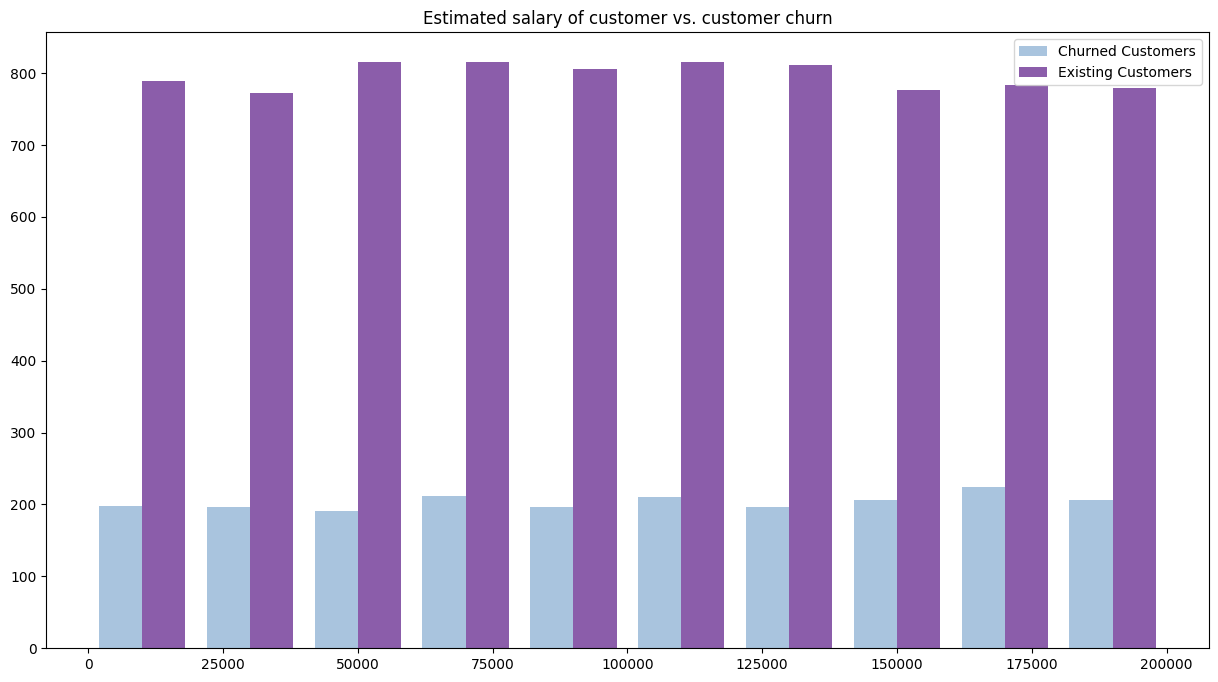

In [56]:
existing = df[df['Exited'] == 0]
churned = df[df['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(figsize=(15,8))

ax.hist([churned['EstimatedSalary'], existing['EstimatedSalary']], color=colors)
ax.set_title('Estimated salary of customer vs. customer churn')
ax.legend(('Churned Customers', 'Existing Customers'))

In [57]:
df[['EstimatedSalary', 'Exited']].corr()

,EstimatedSalary,Exited
EstimatedSalary,1.000000,0.012097
Exited,0.012097,1.000000


The data indicates no significant correlation between the `EstimatedSalary` and `Exited` features. 

Consequently, our __third hypothesis is thus invalidated.__ There is no evidence to suggest that customers with lower estimated salaries are more likely to churn.

__4. Customers older than 35 are less likely to churn.__

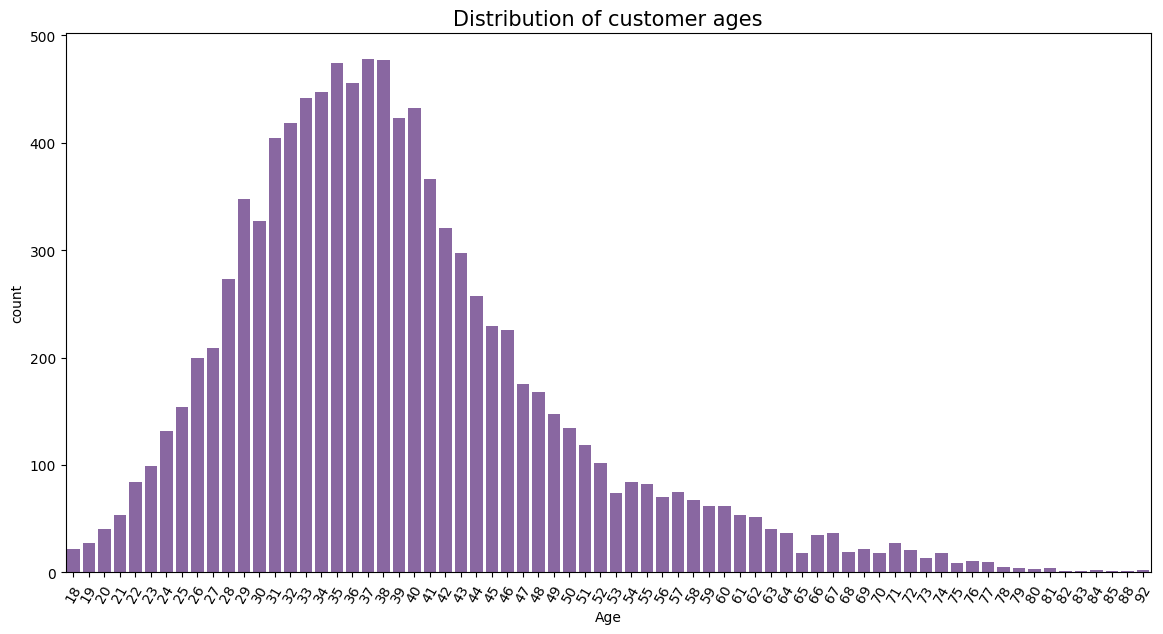

In [24]:
# plot the age distribution
color = sns.color_palette('BuPu', 8)[5]

plt.figure(figsize=(14,7))
f1 = sns.countplot(x=df['Age'], color=color) 
f1.tick_params(axis='x', labelrotation=60) 
f1.set(xlabel="Age") 
f1.set_title('Distribution of customer ages', fontsize=15); 

The graph illustrates that the majority of customers are between the ages of 31 and 40. Let's compare the `Age` and `Exited` features.

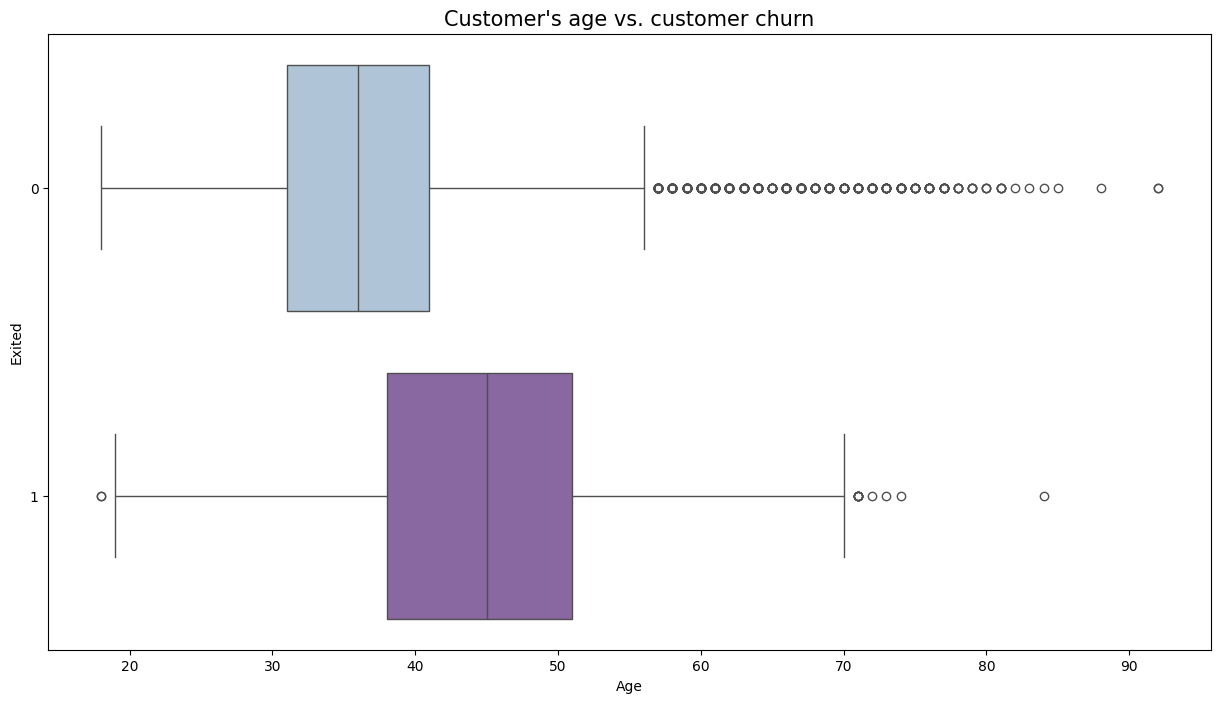

In [25]:
plt.figure(figsize=(15,8))
f1 = sns.boxplot(x='Age', y='Exited', data=df, palette='BuPu', orient='h')
f1.set_title("Customer's age vs. customer churn", fontsize=15);

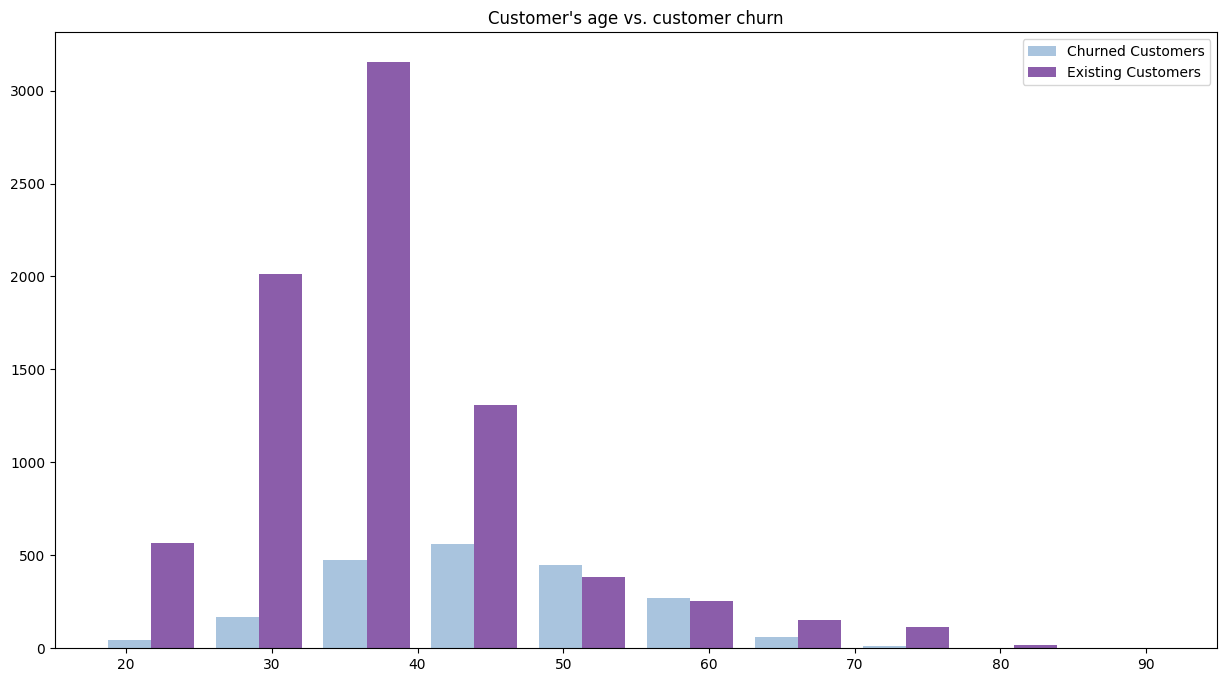

In [26]:
existing = df[df['Exited'] == 0]
churned = df[df['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(figsize=(15,8))

ax.hist([churned['Age'], existing['Age']], color=colors)
ax.set_title("Customer's age vs. customer churn")
ax.legend(('Churned Customers', 'Existing Customers'))

In [38]:
df[['Age', 'Exited']].corr()

,Age,Exited
Age,1.000000,0.285323
Exited,0.285323,1.000000


The relationship between `Age` and `Exited` appears promising; however it is not strong enough to support our __fourth hypothesis.__

Consequently, there is no evidence to suggest that customers above the age of 35 are less likely to churn.

__5. Customers with higher credit scores are less likely to churn.__


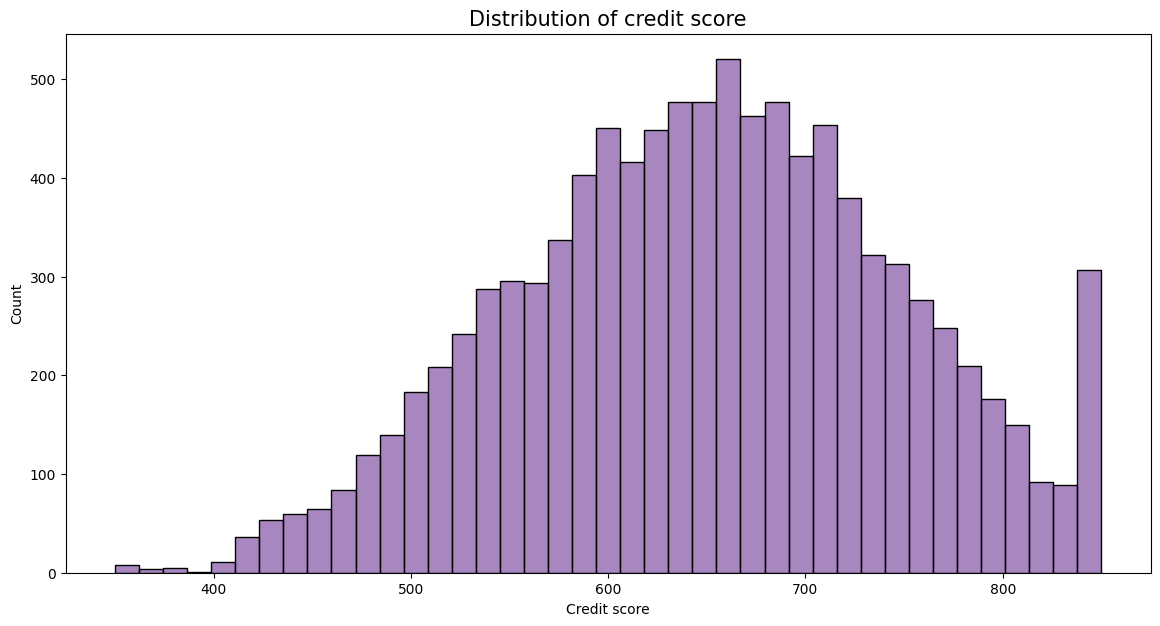

In [17]:
# plot the credit score distribution
color = sns.color_palette('BuPu', 8)[5]

plt.figure(figsize=(14,7))
f1 = sns.histplot(x=df['CreditScore'], color=color) 
f1.tick_params(axis='x') 
f1.set(xlabel="Credit score") 
f1.set_title('Distribution of credit score', fontsize=15);

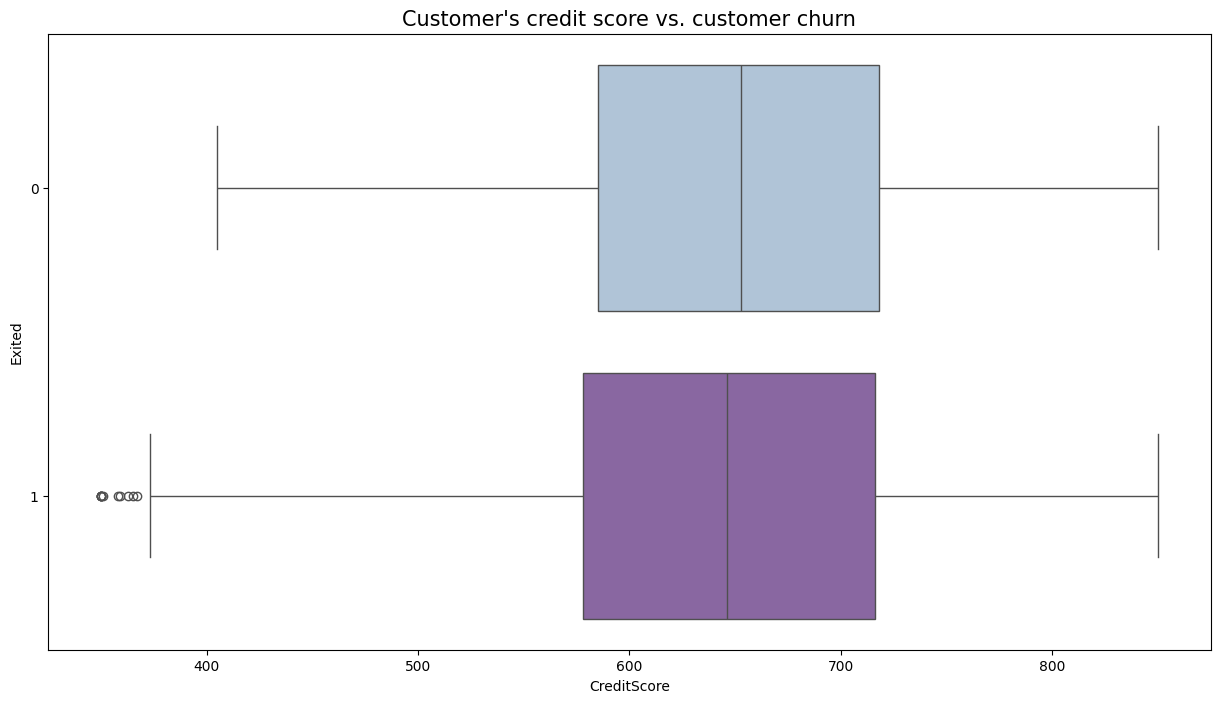

In [18]:
plt.figure(figsize=(15,8))
f1 = sns.boxplot(x='CreditScore', y='Exited', data=df, palette='BuPu', orient='h')
f1.set_title("Customer's credit score vs. customer churn", fontsize=15);

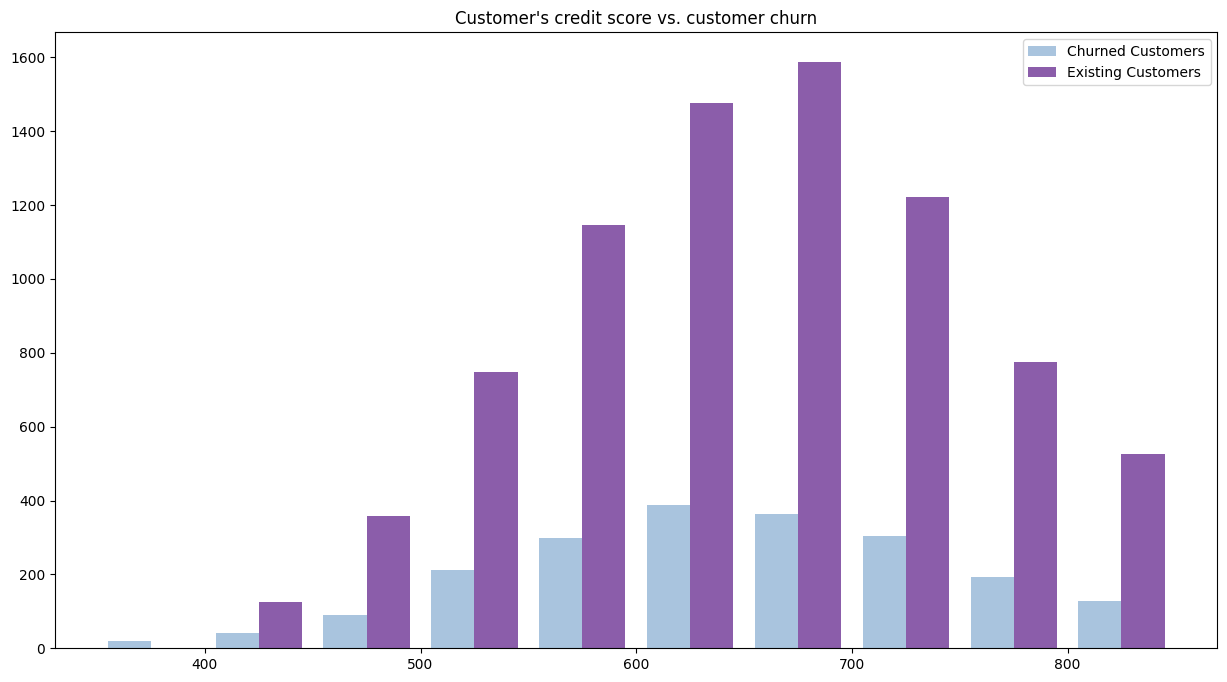

In [19]:
existing = df[df['Exited'] == 0]
churned = df[df['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(figsize=(15,8))

ax.hist([churned['CreditScore'], existing['CreditScore']], color=colors)
ax.set_title("Customer's credit score vs. customer churn")
ax.legend(('Churned Customers', 'Existing Customers'))

In [20]:
df[['CreditScore', 'Exited']].corr()

,CreditScore,Exited
CreditScore,1.000000,-0.027094
Exited,-0.027094,1.000000


The data indicates no significant correlation between the `CreditScore` and `Exited` columns.

Therefore, our __fifth hypothesis is thus invalidated.__ There is no evidence to suggest that customers with higher credit scores are less likely to churn.

__6. Customer churn is less likely influenced by customer's gender.__   
__7. Customer churn is less likely influenced by the customer's geographic region of origin.__

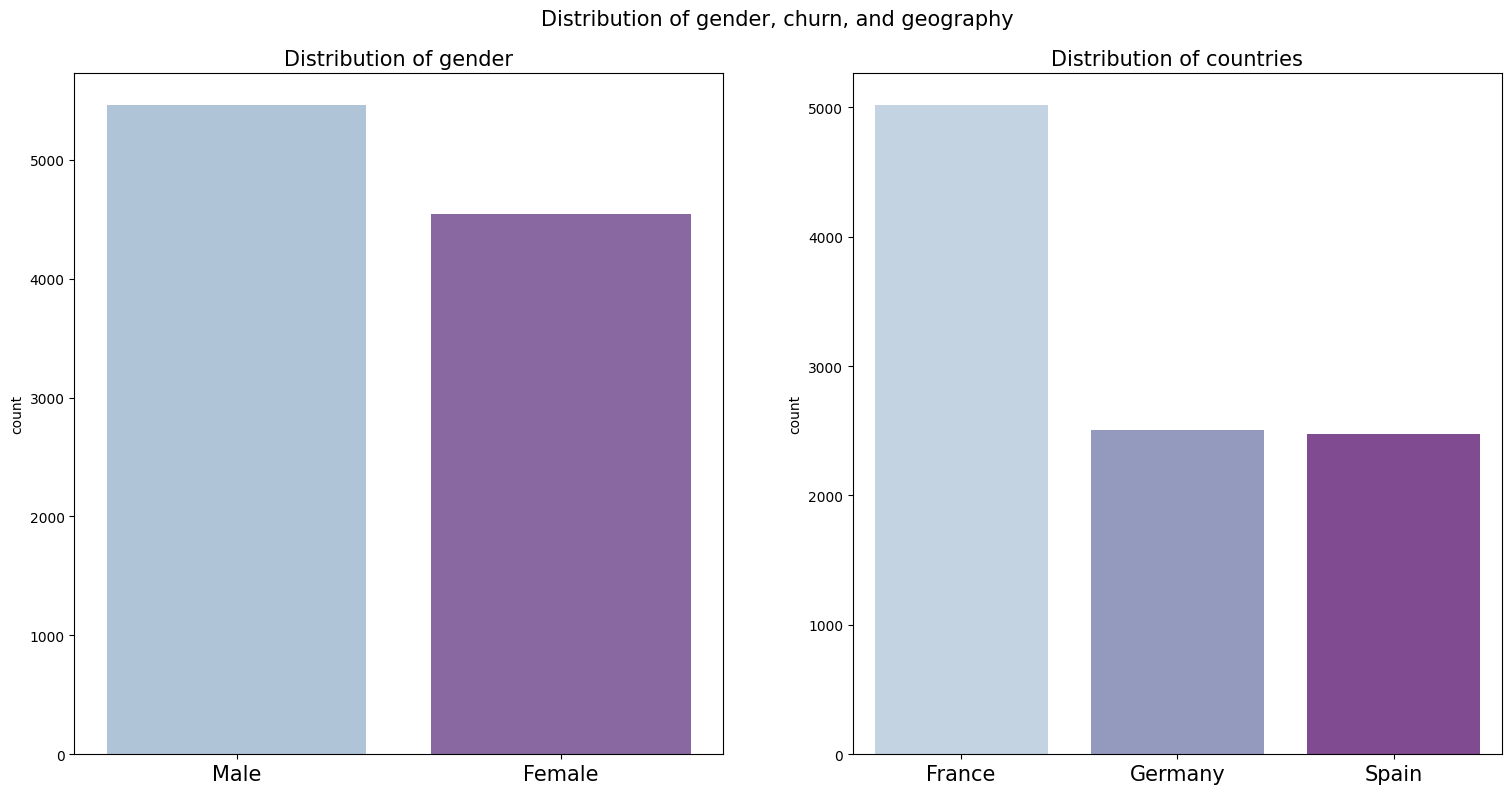

In [23]:
fig, ax = plt.subplots(1,2, figsize=(15,8)) 
plt.suptitle('Distribution of gender, churn, and geography', fontsize=15)
fig.tight_layout() 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) 
 
f1 = sns.countplot(x=df['Gender'], ax=ax[0], palette='BuPu') 
f1.tick_params(axis='x', labelsize=15)
f1.set(xlabel=None) 
f1.set_title('Distribution of gender', fontsize=15); 
 
f2 = sns.countplot(x=df['Geography'], ax=ax[1], palette='BuPu') 
f2.tick_params(axis='x', labelsize=15)
f2.set(xlabel=None) 
f2.set_title('Distribution of countries', fontsize=15); 

In [34]:
df_copy.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')

It seems that most of our customers are from France, let's take a closer look at the features.

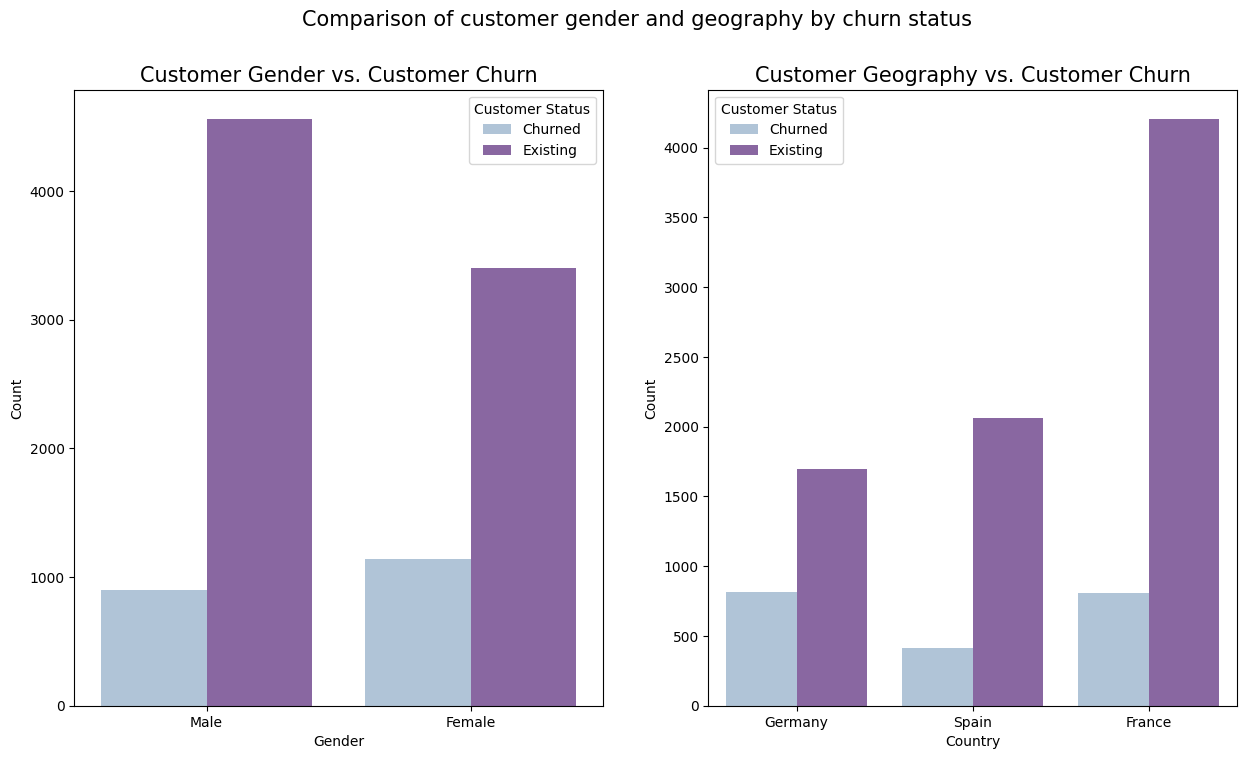

In [24]:
existing = df_copy[df_copy['Exited'] == 0]
churned = df_copy[df_copy['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
plt.suptitle("Comparison of customer gender and geography by churn status", fontsize=15)

# gender distribution
gender_counts = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Churned': [churned['Gender_Male'].sum(), len(churned) - churned['Gender_Male'].sum()],
    'Existing': [existing['Gender_Male'].sum(), len(existing) - existing['Gender_Male'].sum()]
})
gender_counts = gender_counts.melt(id_vars='Gender', var_name='Status', value_name='Count')

sns.barplot(data=gender_counts, x='Gender', y='Count', hue='Status', palette=colors, ax=ax[0])
ax[0].set_title("Customer Gender vs. Customer Churn", fontsize=15)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Gender')
ax[0].legend(title='Customer Status')

# geography distribution
geo_counts = pd.DataFrame({
    'Geography': ['Germany', 'Spain', 'France'],
    'Churned': [
        churned['Geography_Germany'].sum(),
        churned['Geography_Spain'].sum(),
        len(churned) - churned['Geography_Germany'].sum() - churned['Geography_Spain'].sum()
    ],
    'Existing': [
        existing['Geography_Germany'].sum(),
        existing['Geography_Spain'].sum(),
        len(existing) - existing['Geography_Germany'].sum() - existing['Geography_Spain'].sum()
    ]
})
geo_counts = geo_counts.melt(id_vars='Geography', var_name='Status', value_name='Count')

sns.barplot(data=geo_counts, x='Geography', y='Count', hue='Status', palette=colors, ax=ax[1])
ax[1].set_title("Customer Geography vs. Customer Churn", fontsize=15)
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Country')
ax[1].legend(title='Customer Status')


The proportion of churned customers appears similar for both males and females. While the total number of male customers is slightly higher than females, the churn rate seems consistent across genders. Based on this visualization, gender does not appear to have a strong influence on customer churn.

There are noticeable differences in churn proportions across regions: Germany may exhibit a higher churn rate relative to the other regions, while Spain and France seem to have lower churn rates.

This indicates that geographic region might influence churn, particularly in Germany. Seventh hypothesis could be rejected unless statistical testing (e.g., chi-square test or proportion tests) indicates no significant association between churn and geographic region.

Let's do the chi-square testing for `Gender` and `Geography` features.

In [48]:
gender_contingency = pd.crosstab(df_copy['Gender_Male'], df_copy['Exited'])
chi2, p, dof, expected = chi2_contingency(gender_contingency)
print(f"Chi-Square Test for Gender: p-value = {p}")

Chi-Square Test for Gender: p-value = 2.2482100097131755e-26


In [49]:
geo_contingency = pd.crosstab(df_copy[['Geography_Germany', 'Geography_Spain']].idxmax(axis=1), df_copy['Exited'])
chi2, p, dof, expected = chi2_contingency(geo_contingency)
print(f"Chi-Square Test for Geography: p-value = {p}")

Chi-Square Test for Geography: p-value = 1.6239910333565774e-07


As the p-values for `Gender` and `Geography` are greater than 0.05, we can confirm that our __sixth and seventh hypotheses are validated.__     
Consequently, it is accurate to conclude that customer churn is less likely to be influenced by a customer's geographical location or gender.

# EDA conclusion

To provide an overview of the dataset, it initially consisted of 10,000 rows (customers) and 11 columns (various information about the customers related to the bank and their subscription). However, for EDA purposes, we excluded irrelevant features (`RowNumber` and `Surname`) and worked with 9 columns. For more details, refer to [Understanding the Dataset](#understanding-the-dataset) and [Explanatory Data Analysis](#explanatory-data-analysis).

Among the features, two (`Geography` and `Gender`) are categorical, while the rest are numerical. The dataset contains no missing or duplicate values, but the target column (`Exited`) exhibits __class imbalance__, with 20% churned and 80% non-churned customers.

### Descriptive statistics
The dataset revealed the following key statistics:
- __Estimated Salary:__ Average of $100,090.
- __Credit Score:__ Average of 650.53.
- __Age:__ Average of 39 years.
- __Tenure:__ Average of 5 years.
- __Account Balance:__ Average of $76,458.
- __Churn Rate:__ Approximately 20% (average `Exited` value: 0.2037).

### Key findings from hypothesis testing
1. __Invalidated hypotheses:__
   - Customers with higher tenure are less likely to churn.
   - Customers with lower balances are more likely to churn.
   - Customers with lower estimated salaries are more likely to churn.
   - Customers older than 35 are less likely to churn.
   - Customers with higher credit scores are less likely to churn.

   These hypotheses were invalidated due to weak correlations or relationships observed between these features and the churn rate.

2. __Validated hypotheses:__
   - __Customer churn is less likely influenced by the customer's gender.__
   - __Customer churn is less likely influenced by the customer's geographic region.__

   Both hypotheses were supported, as the p-values for gender (2.248) and geography (1.623) indicated no statistically significant impact on churn behavior.

### Next steps
Based on the insights gained from EDA, the following actions are recommended for the next phase of the project:
- Address the __class imbalance__ in the `Exited` column using techniques such as oversampling or undersampling.
- Perform __one-hot encoding__ for categorical columns (`Geography` and `Gender`) to prepare the data for machine learning models.
- Split the dataset into training, validation, and test sets.
- Standardize or normalize numerical features (e.g., `Credit Score`, `Estimated Salary`) to improve model performance.
- Begin feature selection and engineering based on insights from EDA to improve predictive power.

# Data preprocessing

Since this is a binary classification problem, we will use models such as `LogisticRegression`, `RandomForestClassifier`, `GradientBoostingClassifier`, and `XGBClassifier` to identify the best model for predicting customer churn. Among these models, only `LogisticRegression` requires the data to be standardized and balanced data to train on. 

Therefore, the data splitting and preprocessing steps will be taken to meet these requirements.

In [5]:
# import libraries
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, mean_squared_error, confusion_matrix, log_loss, classification_report, roc_curve, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from imblearn.over_sampling import SMOTE

In [8]:
df_copy.head()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15787619,844,18,2,160980.03,145936.28,0,False,False,True
1,15770309,656,18,10,151762.74,127014.32,0,False,False,True
2,15569178,570,18,4,82767.42,71811.90,0,False,False,False
3,15795519,716,18,3,128743.80,197322.13,0,True,False,False
4,15621893,727,18,4,133550.67,46941.41,0,False,False,True


In [6]:
df_copy.drop(["CustomerId"], axis=1, inplace=True)

In [7]:
df_copy.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,844,18,2,160980.03,145936.28,0,False,False,True
1,656,18,10,151762.74,127014.32,0,False,False,True
2,570,18,4,82767.42,71811.90,0,False,False,False
3,716,18,3,128743.80,197322.13,0,True,False,False
4,727,18,4,133550.67,46941.41,0,False,False,True


### Splitting data

In [8]:
# define our variables
X = df_copy.drop(columns=['Exited'])
y = df_copy['Exited']

In [9]:
# split the dataset for baseline model: logistic regression
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# split the dataset for models: random forest, xgboost, and gradient descend
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# convert the boolean values into numerical values
X_train_log['Gender_Male'] = X_train_log['Gender_Male'].astype(int)
X_train_log['Geography_Germany'] = X_train_log['Geography_Germany'].astype(int)
X_train_log['Geography_Spain'] = X_train_log['Geography_Spain'].astype(int)

X_test_log['Gender_Male'] = X_test_log['Gender_Male'].astype(int)
X_test_log['Geography_Germany'] = X_test_log['Geography_Germany'].astype(int)
X_test_log['Geography_Spain'] = X_test_log['Geography_Spain'].astype(int)

In [14]:
# check result
X_train_log.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,651,56,4,0.00,84383.22,0,0,0
1561,699,29,3,125689.29,151623.71,0,0,1
1670,751,30,6,0.00,15766.10,0,0,0
6087,748,40,0,0.00,60416.76,0,0,1
6669,630,41,7,107511.52,46156.87,0,1,1


In [13]:
# numerical features to scale for logistic regression
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()

In [14]:
# apply StandardScaler
X_train_log[numerical_features] = scaler.fit_transform(X_train_log[numerical_features])
X_test_log[numerical_features] = scaler.fit_transform(X_test_log[numerical_features])

In [15]:
# check result
X_train_log.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,0.001670,1.616617,-0.354288,-1.224147,-0.281457,0,0,0
1561,0.498550,-0.949348,-0.699346,0.787873,0.890639,0,0,1
1670,1.036837,-0.854312,0.335827,-1.224147,-1.477549,0,0,0
6087,1.005782,0.096045,-1.734519,-1.224147,-0.699226,0,0,1
6669,-0.215714,0.191081,0.680885,0.496885,-0.947796,0,1,1


In [18]:
X_train_log.describe

<bound method NDFrame.describe of       CreditScore       Age    Tenure   Balance  EstimatedSalary  \
9254     0.001670  1.616617 -0.354288 -1.224147        -0.281457   
1561     0.498550 -0.949348 -0.699346  0.787873         0.890639   
1670     1.036837 -0.854312  0.335827 -1.224147        -1.477549   
6087     1.005782  0.096045 -1.734519 -1.224147        -0.699226   
6669    -0.215714  0.191081  0.680885  0.496885        -0.947796   
...           ...       ...       ...       ...              ...   
5734    -0.288176  0.001010 -1.389461  1.351573        -0.379227   
5191    -1.157715 -0.094026  0.335827 -1.224147         0.912539   
5390    -0.029384 -0.094026 -1.044404 -1.224147        -1.585879   
860     -0.546968 -1.139419  1.716058  1.517746        -0.285764   
7270     0.405385  0.381153 -1.044404  1.441530         0.333198   

      Geography_Germany  Geography_Spain  Gender_Male  
9254                  0                0            0  
1561                  0              

### Handling imbalanced data

We can balance the dataset by using the `SMOTE` technique for logistic regression model, as it works best with balanced data.

In [16]:
smote = SMOTE(random_state=42)
X_train_log_smo, y_train_log_smo = smote.fit_resample(X_train_log, y_train_log)

In [17]:
# check result
X_train_log_smo.shape

(12746, 8)

# Training models

## Baseline model: Logistic Regression

In [ ]:
# create and train logistic regression model
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train_log_smo, y_train_log_smo)

LogisticRegression(max_iter=1000)

In [ ]:
# predict for logictic regression model
pred_log = model_log.predict(X_test_log)

In [23]:
# evaluate logistic regression model
accuracy_log = accuracy_score(y_test_log, pred_log)
precision_log = precision_score(y_test_log, pred_log)
recall_log = recall_score(y_test_log, pred_log)
f1_log = f1_score(y_test_log, pred_log)
auc_log = roc_auc_score(y_test_log, pred_log)

In [24]:
print("\nLogistic Regression Model Evaluation:")
print(f'Accuracy: {accuracy_log:.2f}')
print(f'Precision: {precision_log:.2f}')
print(f'Recall: {recall_log:.2f}')
print(f'F1 Score: {f1_log:.2f}')
print(f'AUC: {auc_log:.2f}')


Logistic Regression Model Evaluation:
Accuracy: 0.72
Precision: 0.39
Recall: 0.66
F1 Score: 0.49
AUC: 0.70


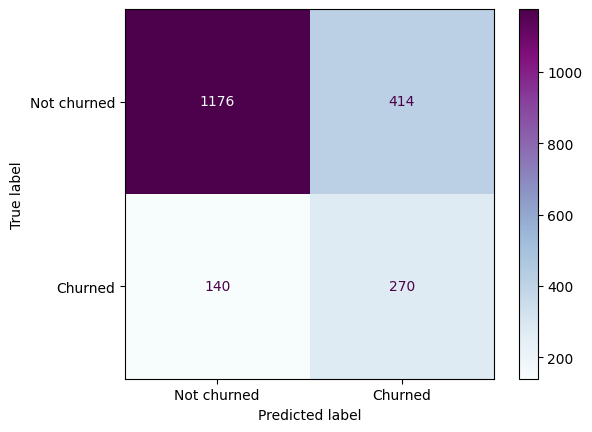

In [26]:
# plot confusion matrix for logistic regression model prediction
cm_log = confusion_matrix(y_test_log, pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Not churned', 'Churned'])
disp_log.plot(cmap='BuPu')

## Model 1: Random Forest

In [26]:
# create and train random forest model
model_ranfor = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model_ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [28]:
# predict for random forest model
pred_ranfor = model_ranfor.predict(X_test)

In [29]:
# evaluate random forest model
accuracy_ran = accuracy_score(y_test, pred_ranfor)
precision_ran = precision_score(y_test, pred_ranfor)
recall_ran = recall_score(y_test, pred_ranfor)
f1_ran = f1_score(y_test, pred_ranfor)
auc_ran = roc_auc_score(y_test, pred_ranfor)

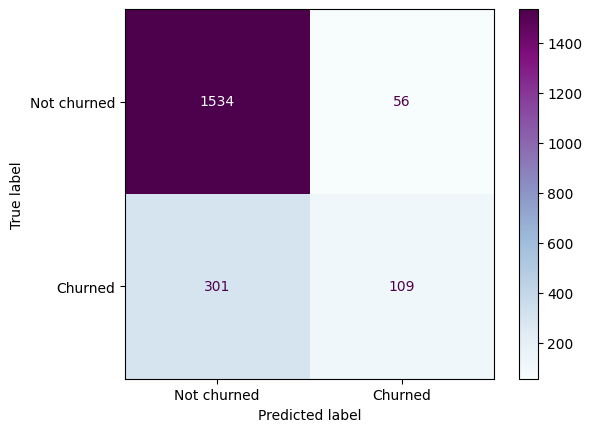

In [31]:
# plot confusion matrix for random forest model prediction
cm_ran = confusion_matrix(y_test, pred_ranfor)
disp_ran = ConfusionMatrixDisplay(confusion_matrix=cm_ran, display_labels=['Not churned', 'Churned'])
disp_ran.plot(cmap='BuPu')

## Model 2: Gradient Boosting

In [32]:
# create and train gradient boosting model
model_grad = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
model_grad.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [33]:
# predict for gradient boosting model
pred_grad = model_grad.predict(X_test)

In [34]:
# evaluate gradient boosting model
accuracy_grad = accuracy_score(y_test, pred_grad)
precision_grad = precision_score(y_test, pred_grad)
recall_grad = recall_score(y_test, pred_grad)
f1_grad = f1_score(y_test, pred_grad)
auc_grad = roc_auc_score(y_test, pred_grad)

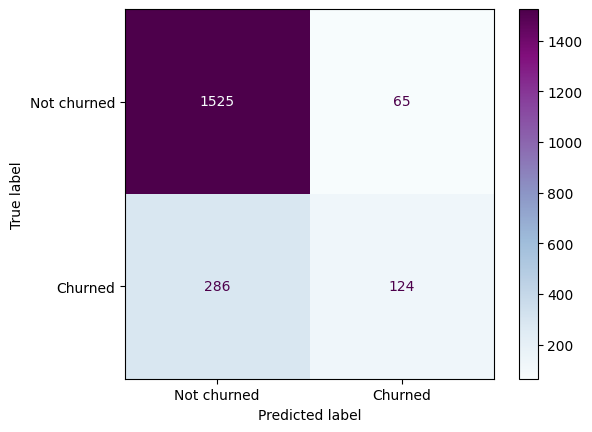

In [37]:
# plot confusion matrix for gradient boosting model prediction
cm_grad = confusion_matrix(y_test, pred_grad)
disp_grad = ConfusionMatrixDisplay(confusion_matrix=cm_grad, display_labels=['Not churned', 'Churned'])
disp_grad.plot(cmap='BuPu')

## Model 3: XGBoost

In [38]:
# create and train xgboost model
model_xgb = XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    scale_pos_weight=5)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [39]:
# predict for xgboost model
pred_xgb = model_xgb.predict(X_test)

In [40]:
# evaluate xgboost model
accuracy_xgb = accuracy_score(y_test, pred_xgb)
precision_xgb = precision_score(y_test, pred_xgb)
recall_xgb = recall_score(y_test, pred_xgb)
f1_xgb = f1_score(y_test, pred_xgb)
auc_xgb = roc_auc_score(y_test, pred_xgb)

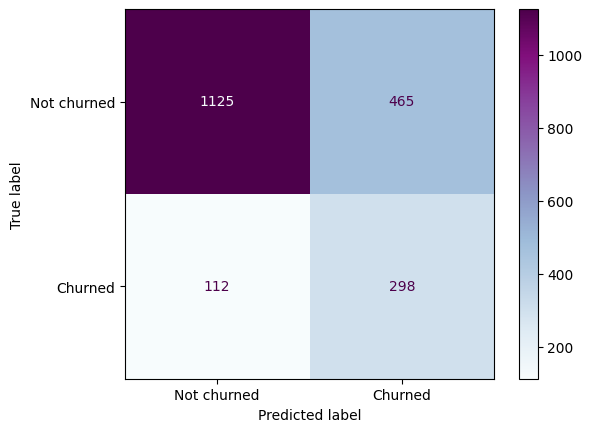

In [42]:
# plot confusion matrix for xgboost model prediction
cm_xgb = confusion_matrix(y_test, pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Not churned', 'Churned'])
disp_xgb.plot(cmap='BuPu')

## Evaluating the models

In [46]:
print("\nLogistic Regression Model Evaluation:")
print(f'Accuracy: {accuracy_log:.2f}')
print(f'Precision: {precision_log:.2f}')
print(f'Recall: {recall_log:.2f}')
print(f'F1 Score: {f1_log:.2f}')
print(f'AUC: {auc_log:.2f}')

print("\nRandom Forest Model Evaluation:")
print(f'Accuracy: {accuracy_ran:.2f}')
print(f'Precision: {precision_ran:.2f}')
print(f'Recall: {recall_ran:.2f}')
print(f'F1 Score: {f1_ran:.2f}')
print(f'AUC: {auc_ran:.2f}')

print("\nGradient Boosting Model Evaluation:")
print(f'Accuracy: {accuracy_grad:.2f}')
print(f'Precision: {precision_grad:.2f}')
print(f'Recall: {recall_grad:.2f}')
print(f'F1 Score: {f1_grad:.2f}')
print(f'AUC: {auc_grad:.2f}')

print("\nXGBoost Model Evaluation:")
print(f'Accuracy: {accuracy_xgb:.2f}')
print(f'Precision: {precision_xgb:.2f}')
print(f'Recall: {recall_xgb:.2f}')
print(f'F1 Score: {f1_xgb:.2f}')
print(f'AUC: {auc_xgb:.2f}')


Logistic Regression Model Evaluation:
Accuracy: 0.72
Precision: 0.39
Recall: 0.66
F1 Score: 0.49
AUC: 0.70

Random Forest Model Evaluation:
Accuracy: 0.82
Precision: 0.66
Recall: 0.27
F1 Score: 0.38
AUC: 0.62

Gradient Boosting Model Evaluation:
Accuracy: 0.82
Precision: 0.66
Recall: 0.30
F1 Score: 0.41
AUC: 0.63

XGBoost Model Evaluation:
Accuracy: 0.71
Precision: 0.39
Recall: 0.73
F1 Score: 0.51
AUC: 0.72


#### Insights from model evaluation    

__Logistic Regression:__
- `Precision: 0.39` and `F1 Score: 0.49` are low.
- `Recall: 0.66` and `AUC: 0.70` have relatively decent scores.

__Random Forest & Gradient Boosting:__
- Two models have high `Accuracy: 0.82`, but `Recall` is very low `0.27` and `0.30`, respectively.
- These models are precise but miss a lot of churn cases (false negatives).
- Likely overfitting the majority class, given the imbalanced dataset.

__XGBoost:__
- `Recall: 0.73` is the highest, capturing more churn cases.
- `Precision: 0.39` and `F1 Score: 0.51` indicate room for improvement.
- `AUC: 0.72` is comparable to Logistic Regression.    

__All in all, we should focus on high `Recall` since we can afford having false positives but not false negatives, in other words, predicting staying(not churned) customer is safer and a lot cheaper than missing possible churn cases for the bank.__

## Next Steps for Improvement

Evaluation metrics indicate that the models are currently underperforming in terms of identifying churn cases (recall). Given the limited linear relationships observed in exploratory data analysis (EDA), we will focus on refining `Random Forest` and `Gradient Boosting` models, which can capture complex patterns that may not be evident in linear correlations. The objective is to enhance recall since having false positives are costly than false negatives. In other words, missing a customer who is likely to cancel their subscription is worse than mistakenly targeting a customer who intends to stay. Additionally, the `Logistic Regression` model will be revisited to serve as a simple yet effective benchmark.    

### Baseline Model: Logistic Regression
- **Feature Engineering:** Explore additional transformations, such as interaction terms, to enhance feature representation.
- **Handling Imbalance:** Redefine the logistic regression model with `class_weight='balanced'` to address class imbalance.
- **Hyperparameter Tuning:** Use `GridSearchCV` to optimize parameters, considering the relatively small dataset (8,000 rows and 8 columns).

### Model 1: Random Forest
- **Handling Imbalance:** Introduce `class_weight='balanced'` to account for the minority class (churn cases).
- **Hyperparameter Tuning:** Use `GridSearchCV` to explore:
  - `n_estimators` (e.g., 100–300)
  - `max_depth` (e.g., 5–15)
  - `min_samples_split` (e.g., 10–50)
  - `min_samples_leaf` (e.g., 5–30)

### Model 2: Gradient Boosting
- **Handling Imbalance:** Adjust the `scale_pos_weight` parameter based on the class imbalance ratio to give more weight to churn cases.
- **Hyperparameter Tuning:** Optimize parameters using `GridSearchCV`:
  - `learning_rate` (e.g., 0.01–0.1)
  - `max_depth` (e.g., 3–7)
  - `n_estimators` (e.g., 100–300)
  - `subsample` (e.g., 0.7–1.0)


## Improving the models

In [11]:
# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_recall_curve
from sklearn.utils.class_weight import compute_sample_weight

### Baseline model: Logistic Regression

In [32]:
# apply polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_log_poly = poly.fit_transform(X_train_log)
X_test_log_poly = poly.transform(X_test_log)

In [33]:
# redefine the logistic regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

In [34]:
# apply hyperparameter tuning using gridsearchcv
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search_log = GridSearchCV(log_reg, param_grid, scoring='recall', cv=5)
grid_search_log.fit(X_train_log_poly, y_train_log)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='recall')

In [35]:
# save the best model and calculate probabilities
best_log_reg = grid_search_log.best_estimator_
y_proba_log = best_log_reg.predict_proba(X_test_log_poly)

In [36]:
# predict with and evaluate improved logistic regression model
y_pred_log = best_log_reg.predict(X_test_log_poly)
print("Logistic Regression Performance:")
print(classification_report(y_test_log, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1590
           1       0.38      0.69      0.49       410

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.71      0.73      2000



### Model 1: Random Forest

In [37]:
# redefine the random forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

#### Hyperparameter tuning

In [38]:
# apply hyperparameter tuning using gridsearchcv
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='recall', cv=5)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [10, 20, 50],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [39]:
# save the best model and calculate probabilities
best_rf = grid_search_rf.best_estimator_
y_proba_rf = best_rf.predict_proba(X_test)

In [40]:
# predict with and evaluate the best random forest model
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1590
           1       0.41      0.69      0.51       410

    accuracy                           0.73      2000
   macro avg       0.66      0.72      0.66      2000
weighted avg       0.80      0.73      0.75      2000



### Model 2: Gradient Boosting

In [27]:
# compute sample weights for the training data
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [28]:
# redefine the gradient boosting model
gb = GradientBoostingClassifier(random_state=42)

In [29]:
# apply hyperparameter tuning using gridsearchcv
param_grid_gb = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_gb = GridSearchCV(gb, param_grid_gb, scoring='recall', cv=5, n_jobs=-1)
grid_search_gb.fit(X_train, y_train, sample_weight=sample_weights)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='recall')

In [30]:
# save the best model and calculate probabilities
best_gb = grid_search_gb.best_estimator_
y_proba_gb = best_gb.predict_proba(X_test)

In [31]:
# predict with and evaluate the best gradient boosting model
y_pred_gb = best_gb.predict(X_test)
print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1590
           1       0.42      0.70      0.52       410

    accuracy                           0.74      2000
   macro avg       0.66      0.72      0.67      2000
weighted avg       0.81      0.74      0.76      2000



### Evaluating the models

In [41]:
results = []

def evaluate_model(model_name, y_true, y_pred, y_proba):
    """
    Evaluate a model using common metrics, add results to the DataFrame,
    and display the confusion matrix.
    
    Parameters:
        model_name (str): The name of the model being evaluated.
        y_true (array): The true labels from the test set.
        y_pred (array): The predicted labels by the model.
        y_proba (array): The predicted probabilities for the positive class.
    """
    # metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)

    # append the results to the list
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    })

    # print the confusion matrix
    print(f"=== Confusion Matrix for {model_name} ===")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.show()
    

In [42]:
# ensure all y_test variables are 1D
y_test_log = np.ravel(y_test_log)
y_test = np.ravel(y_test) 

In [43]:
# ensure probabilities for positive class (class 1)
y_proba_log = y_proba_log[:, 1]
y_proba_rf = y_proba_rf[:, 1]
y_proba_gb = y_proba_gb[:, 1]

In [44]:
print("Shape of y_proba_log:", y_proba_log.shape)
print("Shape of y_proba_rf:", y_proba_rf.shape)
print("Shape of y_proba_gb:", y_proba_gb.shape)

Shape of y_proba_log: (2000,)
Shape of y_proba_rf: (2000,)
Shape of y_proba_gb: (2000,)


=== Confusion Matrix for Logistic Regression ===


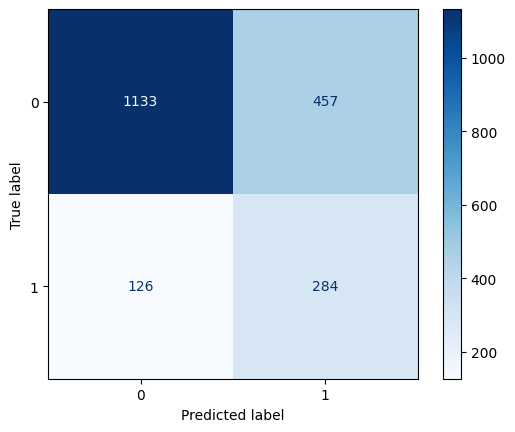

=== Confusion Matrix for Random Forest ===


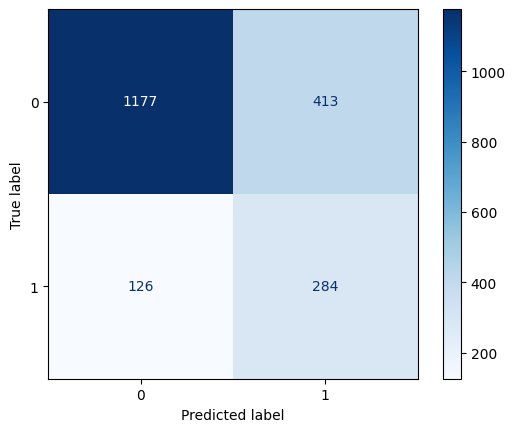

=== Confusion Matrix for Gradient Boosting ===


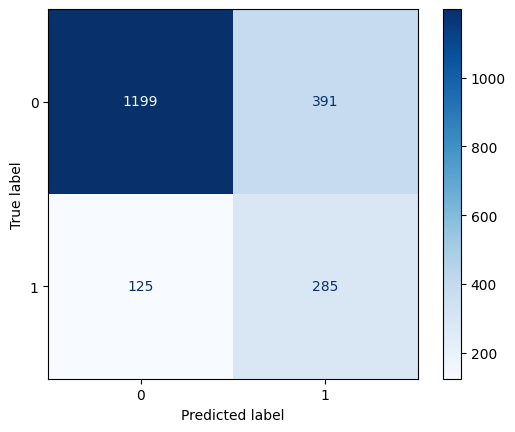

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression    0.7085   0.383266  0.692683  0.493484  0.754215
1        Random Forest    0.7305   0.407461  0.692683  0.513098  0.782620
2    Gradient Boosting    0.7420   0.421598  0.695122  0.524862  0.785162


In [45]:
evaluate_model("Logistic Regression", y_test_log, y_pred_log, y_proba_log)
evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb, y_proba_gb)

# convert results to DataFrame
results_df = pd.DataFrame(results)

# display the summary table
print(results_df)

## Insights into the evaluation metrics

**1. Logistic Regression**
- Moderate `ROC-AUC: 0.75`, indicating a reasonable ability to differentiate between classes, but it struggles with `Precision: 38.3%`, which points to a significant number of false positives.
- However, the model performs well in terms of `Recall: 69.3%`, demonstrating its efficacy in identifying churn cases, which aligns with the objective of minimising false negatives.

**2. Random Forest**
- `Accuracy: 73.1%` reflects a satisfactory general model performance, and `ROC-AUC: 0.78` suggests that it's effective at distinguishing between churn and non-churn cases.
- A balanced `Recall: 69.3%` ensures that it is capable of detecting churn cases without sacrificing too much precision, as reflected in the `Precision: 40.7%`.

**3. Gradient Boosting**
- Best `Accuracy: 74.2%` and solid `ROC-AUC: 0.79`, showing strong performance in classification tasks.
- `Recall: 69.5%` is comparable to the other models, but the `Precision: 42.2%` remains slightly better than the other models, which could help reduce false positives in applications where precision is more important.

##### Although all three models have comparable `Recall` values, the `Random Forest` and `Gradient Boosting` models provide better overall performance. Given our objective to enhance the model's capacity to identify churn cases while maintaining balanced performance, our subsequent steps will focus on improving the `Gradient Boosting` model.

## Improving and predicting with the gradient boosting model

In [12]:
# import libraries
import shap

In [13]:
# compute sample weights for the training data
gb_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [14]:
# define gradient boosting model
gb_final = GradientBoostingClassifier(random_state=42)

In [15]:
# apply hyperparameter tuning using gridsearchcv
param_grid_final = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

grid_final = GridSearchCV(gb_final, param_grid_final, scoring='recall', cv=5, n_jobs=-1)
grid_final.fit(X_train, y_train, sample_weight=gb_weights)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [200, 300, 400],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='recall')

In [16]:
# inspect the weights
print(np.unique(gb_weights, return_counts=True))

(array([0.62764789, 2.4585126 ]), array([6373, 1627]))


In [17]:
# retrieve best estimator
best_gb_final = grid_final.best_estimator_

In [18]:
# optimise decision threshold
y_proba_final = best_gb_final.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_final)
optimal_idx = np.argmax(recall)
optimal_threshold = thresholds[optimal_idx]
y_pred_gb_custom = (y_proba_final >= optimal_threshold).astype(int)

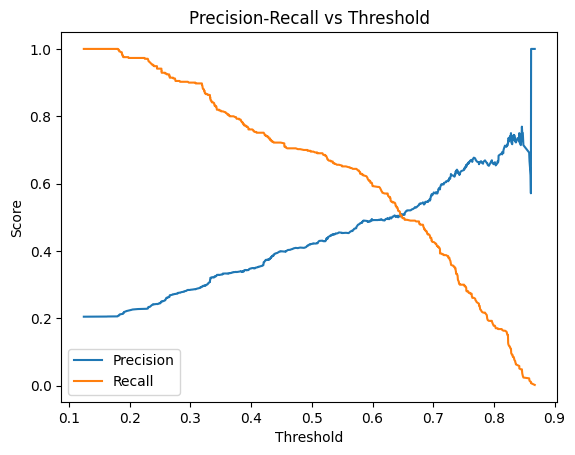

In [19]:
# visualise the trade-offs
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.show()

##### Our primary objective is to maximise `Recall` to ensure we identify as many potential churn cases as possible. This approach prioritises minimising missed churn predictions over other metrics, such as precision or accuracy. Whilst various threshold points could be selected, the chosen threshold balances this goal with meaningful predictive performance.

In [52]:
# try with custom threshold
y_proba_gb = best_gb_final.predict_proba(X_test)[:, 1]
custom_threshold = 0.25
y_pred_custom = (y_proba_gb >= custom_threshold).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.94      0.25      0.40      1590
           1       0.24      0.94      0.39       410

    accuracy                           0.39      2000
   macro avg       0.59      0.60      0.39      2000
weighted avg       0.80      0.39      0.39      2000



In [20]:
# feature importance
importances = best_gb_final.feature_importances_
feature_names = X_train.columns

indices = np.argsort(importances)[::-1] # sort in desceding order

# print each feature name and its importance
for i, idx in enumerate(indices):
    print(f"{i + 1}. {feature_names[idx]}: {importances[idx]:.4f}")

1. Age: 0.7381
2. Balance: 0.0976
3. Geography_Germany: 0.0831
4. Gender_Male: 0.0435
5. CreditScore: 0.0262
6. EstimatedSalary: 0.0095
7. Tenure: 0.0010
8. Geography_Spain: 0.0009


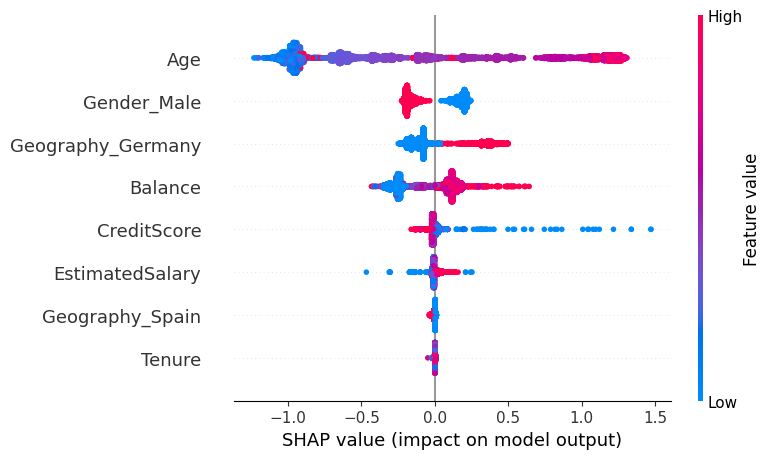

In [21]:
# detailed feature importance with SHAP
explainer = shap.TreeExplainer(best_gb_final)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [22]:
# evaluate with optimized threshold
print(classification_report(y_test, y_pred_gb_custom))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1590
           1       0.20      1.00      0.34       410

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



In [ ]:
# predict with and evaluate the best gradient boosting model without optimized threshold
y_pred_final = best_gb_final.predict(X_test)
print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_final))

Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1590
           1       0.42      0.70      0.52       410

    accuracy                           0.74      2000
   macro avg       0.66      0.72      0.67      2000
weighted avg       0.81      0.74      0.76      2000



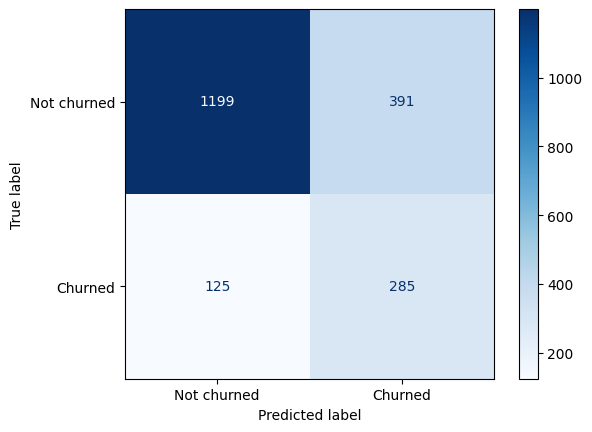

In [34]:
# confusion matrix without the optimized threshold
cm_final = confusion_matrix(y_test, y_pred_final)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=['Not churned', 'Churned'])
disp_cm.plot(cmap='Blues')

In [35]:
# evaluate final model with the optimized threshold
accuracy_gb_custom = accuracy_score(y_test, y_pred_gb_custom)
precision_gb_custom = precision_score(y_test, y_pred_gb_custom)
recall_gb_custom = recall_score(y_test, y_pred_gb_custom)
f1_gb_custom = f1_score(y_test, y_pred_gb_custom)
auc_gb_custom = roc_auc_score(y_test, y_pred_gb_custom)

In [36]:
print("\nGradient Boosting Model Evaluation - optimized threshold:")
print(f'Accuracy: {accuracy_gb_custom:.2f}')
print(f'Precision: {precision_gb_custom:.2f}')
print(f'Recall: {recall_gb_custom:.2f}')
print(f'F1 Score: {f1_gb_custom:.2f}')
print(f'AUC: {auc_gb_custom:.2f}')


Gradient Boosting Model Evaluation - custom threshold:
Accuracy: 0.20
Precision: 0.20
Recall: 1.00
F1 Score: 0.34
AUC: 0.50


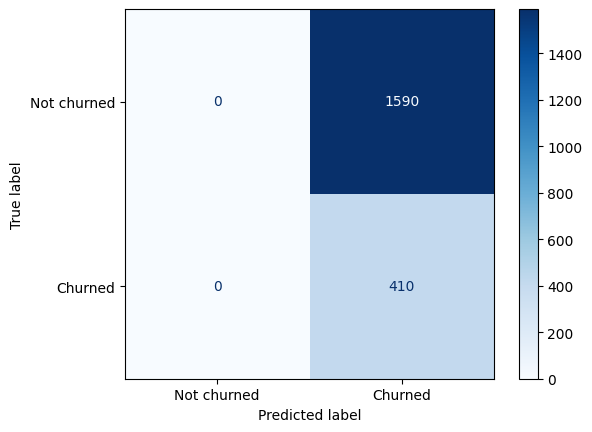

In [33]:
# confusion matrix with the optimized threshold
cm_final_custom = confusion_matrix(y_test, y_pred_gb_custom)
disp_custom_cm = ConfusionMatrixDisplay(confusion_matrix=cm_final_custom, display_labels=['Not churned', 'Churned'])
disp_custom_cm.plot(cmap='Blues')

In [54]:
# evaluate final model with the custom threshold: 0.25
accuracy_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_custom = f1_score(y_test, y_pred_custom)
auc_custom = roc_auc_score(y_test, y_pred_custom)

In [57]:
print("\nGradient Boosting Model Evaluation - custom (0.25) threshold:")
print(f'Accuracy: {accuracy_custom:.2f}')
print(f'Precision: {precision_custom:.2f}')
print(f'Recall: {recall_custom:.2f}')
print(f'F1 Score: {f1_custom:.2f}')
print(f'AUC: {auc_custom:.2f}')


Gradient Boosting Model Evaluation - custom (0.25) threshold:
Accuracy: 0.39
Precision: 0.24
Recall: 0.94
F1 Score: 0.39
AUC: 0.60


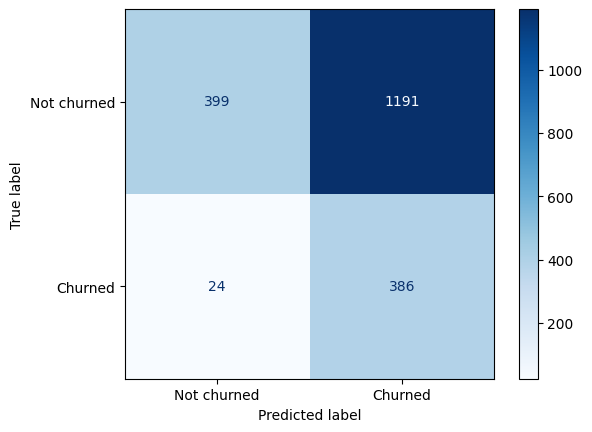

In [56]:
# confusion matrix with the custom threshold (0.25)
cm_custom = confusion_matrix(y_test, y_pred_custom)
disp_custom = ConfusionMatrixDisplay(confusion_matrix=cm_custom, display_labels=['Not churned', 'Churned'])
disp_custom.plot(cmap='Blues')

In [29]:
import pickle

# save the model to a file
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(best_gb_final, file)

# Conclusion

 This project focused on building a machine learning model to predict customer churn, prioritising **high recall** to minimise the risk of missed churned customers. After careful evaluation, a **Gradient Boosting Model** with a custom threshold (0.25) was selected as the final model, achieving:

- **Recall**: 94%
- **Precision**: 24%
- **F1 Score**: 39%
- **Accuracy**: 39%
- **AUC**: 0.60    

**Low precision and accuracy** indicates that a notable proportion of the predicted churners may not actually churn; however, this is acceptable provided that the model effectively identifies the majority of customers who are truly at risk of leaving.  

By prioritising recall, the Gradient Boosting Model effectively minimises the risk of the bank losing valuable customers due to missed churn predictions, **aligning with the primary business objective**.

### Key limitations

1. **Imbalanced dataset**:  
   Despite using techniques to handle class imbalance, the dataset remained skewed, limiting the model’s ability to generalise well.

2. **Small dataset**:  
   The limited amount of data constrained the model's potential performance. More data would allow for better feature representation and improved predictive power.

3. **No interaction terms**:  
   Interaction terms between features were not explored (only with logistic regression). These could provide deeper insights into complex relationships and improve model performance.

4. **Learning stage**:  
   This project marked the beginning of my journey into machine learning. As such, certain advanced techniques (e.g., hyperparameter tuning, cost-sensitive learning, and feature engineering) were only partially explored. This reflects the learning-oriented nature of the project.

### Final Thoughts

This project represents an important milestone in my machine learning journey. It reflects not only the techniques I’ve learnt but also the challenges I faced and the growth I achieved. While the final model meets the primary goal of **high recall**, it also highlights areas for future improvement. I am excited to carry these lessons forward into my capstone project and beyond, building a strong portfolio that demonstrates both technical skills and a commitment to continuous learning.